In [33]:
import requests
import json
import pandas as pd
import pymongo
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pymongo import MongoClient
client = MongoClient()
db = client.RiotAPI

bronze2_user_collection = db.league_bronze2_user
bronze2_accId_collection = db.bronze2_accId
bronze2_gameId_collection = db.bronze2_gameId
bronze2_gameData_collection = db.bronze2_gameData

In [4]:
api_key = 'RGAPI-2bfa9053-b8e6-4fed-928e-8cf4892b96d2'

In [5]:
for i in bronze2_user_collection.find():
    print(i)

{'_id': ObjectId('606ec2048ffd9b98a8de333a'), 'leagueId': '4025fb2e-8d32-472f-85da-6e230ba6e9eb', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'BRONZE', 'rank': 'II', 'summonerId': '7uzFpYDpjhYOkyyy-qFKoP2ixF9DMJiQKJh3AZpYg5FeG8Wp', 'summonerName': '캣바보', 'leaguePoints': 35, 'wins': 10, 'losses': 9, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}
{'_id': ObjectId('606ec2048ffd9b98a8de333b'), 'leagueId': 'cb248d96-2520-4537-a6a1-497f5f398ebf', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'BRONZE', 'rank': 'II', 'summonerId': 'APl6hx4AJJO6BEcToPyfQDTsGuL0wsYhERUpZ8IqhRu8a2Rq', 'summonerName': 'Think2r', 'leaguePoints': 56, 'wins': 4, 'losses': 7, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}
{'_id': ObjectId('606ec2048ffd9b98a8de333c'), 'leagueId': 'a34ee2f3-9ea2-49c6-9c9a-433115412c12', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'BRONZE', 'rank': 'II', 'summonerId': 'dfaEJSCbseq6rPvUDEoqr9TFfslTSPnUvXRuhsYX_6ujOeoe', 'summonerName': '황족 렉

In [23]:
bronze2_sumId_list = list(bronze2_user_collection.find({}, {'_id' : 0, 'summonerId' : 1}))
bronze2_sumId = []
for i in bronze2_sumId_list:
    bronze2_sumId.append(list(i.values())[0])

In [24]:
accountId_API = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/"+bronze2_sumId[0]+"?api_key="+api_key
r_accountId_API = requests.get(accountId_API)
bronze2_accId_collection.insert_one(r_accountId_API.json())
bronze2_accId_collection.find()[3]

{'_id': ObjectId('60764ccccd4838a1de82f52c'),
 'id': '7uzFpYDpjhYOkyyy-qFKoP2ixF9DMJiQKJh3AZpYg5FeG8Wp',
 'accountId': 'PVZWe8gSgh7bs4YRPUaRWRs_kYW0sgf5lafxOGrheyJNI45IQeM7swLh',
 'puuid': 'HMzeLKva0gTfKrRUF5rWEOS5faZc9O2JI3_yjvVQbYp2X3oNueUN_s0gXVSvR953qEt3tMUlM8wPAQ',
 'name': '캣바보',
 'profileIconId': 4904,
 'revisionDate': 1618083010000,
 'summonerLevel': 107}

In [25]:
for i in range(len(bronze2_sumId)):
    accountId_API = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/"+bronze2_sumId[i]+"?api_key="+api_key
    r_accountId_API = requests.get(accountId_API)
    bronze2_accId_collection.insert_one(r_accountId_API.json())
    time.sleep(1.5)

In [26]:
for i in bronze2_accId_collection.find():
    print(i)

{'_id': ObjectId('60764d10cd4838a1de82f52e'), 'id': '7uzFpYDpjhYOkyyy-qFKoP2ixF9DMJiQKJh3AZpYg5FeG8Wp', 'accountId': 'PVZWe8gSgh7bs4YRPUaRWRs_kYW0sgf5lafxOGrheyJNI45IQeM7swLh', 'puuid': 'HMzeLKva0gTfKrRUF5rWEOS5faZc9O2JI3_yjvVQbYp2X3oNueUN_s0gXVSvR953qEt3tMUlM8wPAQ', 'name': '캣바보', 'profileIconId': 4904, 'revisionDate': 1618083010000, 'summonerLevel': 107}
{'_id': ObjectId('60764d12cd4838a1de82f52f'), 'id': 'APl6hx4AJJO6BEcToPyfQDTsGuL0wsYhERUpZ8IqhRu8a2Rq', 'accountId': 'fJLDyUZ85o-LIj_1tggyunMAw65D4fMqMp_9cCLeuLlXo0OoyWShOlO3', 'puuid': 'jOA3DR9KcLKaAzd9qTOtNp9zWs3gKJdEYe0_GyGlUqQOdxn2VewoXqBy_lUZ-b5_EbLFBw3hKkzzzQ', 'name': 'Think2r', 'profileIconId': 4780, 'revisionDate': 1617503307000, 'summonerLevel': 52}
{'_id': ObjectId('60764d14cd4838a1de82f530'), 'id': 'dfaEJSCbseq6rPvUDEoqr9TFfslTSPnUvXRuhsYX_6ujOeoe', 'accountId': 'dW7HzEkPDwrdb_LkFLDpMbuZxk1orFe8zgcSAnjqZt7Vc3ynMH8qNJ0j', 'puuid': 'fmL2a04mv5i8BaoCNJqLInwFFH6-GbUG_oTW12GoXBB-kgWqw8YuASY3UKybKC7OMDAeundGZS-5TA', 'name': '황족

In [27]:
bronze2_accID_list = list(bronze2_accId_collection.find({},{'_id' : 0, 'accountId' : 1} ))
bronze2_accID_list

[{'accountId': 'PVZWe8gSgh7bs4YRPUaRWRs_kYW0sgf5lafxOGrheyJNI45IQeM7swLh'},
 {'accountId': 'fJLDyUZ85o-LIj_1tggyunMAw65D4fMqMp_9cCLeuLlXo0OoyWShOlO3'},
 {'accountId': 'dW7HzEkPDwrdb_LkFLDpMbuZxk1orFe8zgcSAnjqZt7Vc3ynMH8qNJ0j'},
 {'accountId': 'aNUFk4nbJpJURMUT19ZH36LhpErtIDMXIKjVh7tNMz6VGj5qKV042smK'},
 {'accountId': 'bvXeb1KInBSTyH_qFV95pUGYWL8jxnlc6-bqzBwwaFKi6t1_XY7stNj0'},
 {'accountId': 'Sawqf3SSrEtJvAKuqE6xqICQ7Xk9rXQbjmTf-Ml0KC8f5dJLlgedTiz_'},
 {'accountId': 'RIaKLnOpBAwUJNiC4pP9oYlUNFEkJ9oox9zUBWdtAFYiW_hDVzoJRbvJ'},
 {'accountId': 's8o8LhvJJClRzw3Wq3d60e_iTu241nnWpO-4qWkZshZCXu2WUscDz71Y'},
 {'accountId': 'bRGWBl1L1xZqwXaLo6wk8TbZ8c8xq4vaExmd12IAgn-cmpmGB2fvI6b2'},
 {'accountId': '43758yR1F2lwgOfBiJ-I_3o3-lFc1uc3yhHIlCzHkqpyufcBsPy8rNEd'},
 {'accountId': 'BtOHTTh2qipd_vTzMG07SuTdENgmtsy_pZ4MARJO-yXoZnFXg9WwKtBS'},
 {'accountId': 'dbLQJPjawMFwqfOy1f72baDuSZej7Gk1lY4-WIhzVm0nCOIVoQd4TzHe'},
 {'accountId': 'yMaKxREyYUgfpzpk_yNyiCCxAflM-Mb2HEUQ11HZ7eXmmVFkJ-QoLOmO'},
 {'accountId

In [28]:
bronze2_accID = []
for i in bronze2_accID_list:
    bronze2_accID.append(list(i.values())[0])

In [29]:
bronze2_gameID_list = []
for g in bronze2_accID:
    gameId_API = "https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/"+g+'?api_key='+api_key
    r_gameId_API = requests.get(gameId_API)
    bronze2_gameId_collection.insert_one(r_gameId_API.json())
    print(r_gameId_API.json())
    time.sleep(1.5)

{'matches': [{'platformId': 'KR', 'gameId': 5124043377, 'champion': 19, 'queue': 430, 'season': 13, 'timestamp': 1618106585181, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124050778, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1618105082759, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124030013, 'champion': 555, 'queue': 430, 'season': 13, 'timestamp': 1618103446499, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123948071, 'champion': 235, 'queue': 1020, 'season': 13, 'timestamp': 1618101830155, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122092167, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1618038186296, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122060654, 'champion': 58, 'queue': 1020, 'season': 13, 'timestamp': 1618037357304, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121733507, 'champion': 80, 'queue': 430, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5110982508, 'champion': 429, 'queue': 420, 'season': 13, 'timestamp': 1617526846676, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110858852, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1617525421882, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110805299, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1617523841871, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110728202, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1617521969770, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5094175628, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1616841772448, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5094111593, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1616840231630, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5094043700, 'champion': 145, 'qu

{'matches': [{'platformId': 'KR', 'gameId': 5128524926, 'champion': 3, 'queue': 440, 'season': 13, 'timestamp': 1618308505873, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109788690, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1617476702995, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109784636, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1617473771113, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109701920, 'champion': 69, 'queue': 420, 'season': 13, 'timestamp': 1617471415003, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109664094, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1617468887047, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109547275, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1617466521863, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109456010, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1617

{'matches': [{'platformId': 'KR', 'gameId': 5128966828, 'champion': 84, 'queue': 1020, 'season': 13, 'timestamp': 1618320681401, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128932864, 'champion': 142, 'queue': 1020, 'season': 13, 'timestamp': 1618319238949, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128896905, 'champion': 55, 'queue': 1020, 'season': 13, 'timestamp': 1618317911533, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127922394, 'champion': 40, 'queue': 430, 'season': 13, 'timestamp': 1618282012825, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125746391, 'champion': 61, 'queue': 430, 'season': 13, 'timestamp': 1618158815722, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125723345, 'champion': 142, 'queue': 430, 'season': 13, 'timestamp': 1618157029225, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125629557, 'champion': 142, 'queue': 430, '

{'matches': [{'platformId': 'KR', 'gameId': 5127801730, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618264912205, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127788812, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618262900259, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127810508, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618261078388, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127719678, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618258705803, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127709192, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618257087872, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127746908, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618255538321, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127736295, 'champion': 11, 'queue': 420, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5128987224, 'champion': 19, 'queue': 420, 'season': 13, 'timestamp': 1618320987516, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127062172, 'champion': 150, 'queue': 430, 'season': 13, 'timestamp': 1618231855074, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127003116, 'champion': 85, 'queue': 430, 'season': 13, 'timestamp': 1618229831593, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126770315, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1618220992968, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126673045, 'champion': 8, 'queue': 430, 'season': 13, 'timestamp': 1618217062091, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125492246, 'champion': 54, 'queue': 1020, 'season': 13, 'timestamp': 1618147028997, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125420462, 'champion': 103, 'queue': 1020, 's

{'matches': [{'platformId': 'KR', 'gameId': 5128778957, 'champion': 412, 'queue': 440, 'season': 13, 'timestamp': 1618315225209, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128772892, 'champion': 76, 'queue': 440, 'season': 13, 'timestamp': 1618313007243, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125517620, 'champion': 427, 'queue': 440, 'season': 13, 'timestamp': 1618150982681, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125457483, 'champion': 64, 'queue': 440, 'season': 13, 'timestamp': 1618148400451, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125379248, 'champion': 59, 'queue': 440, 'season': 13, 'timestamp': 1618146260915, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125321962, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618143744093, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125224290, 'champion': 64, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5126509053, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618213842506, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122631041, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1618048781551, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122576438, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618047609319, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122464407, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618045807953, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122490094, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618044332977, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122362776, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618042434467, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5108155815, 'champion': 517, 'queue': 430

{'matches': [{'platformId': 'KR', 'gameId': 5124269569, 'champion': 518, 'queue': 1020, 'season': 13, 'timestamp': 1618120488937, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124256669, 'champion': 83, 'queue': 1020, 'season': 13, 'timestamp': 1618119299470, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122868925, 'champion': 53, 'queue': 1020, 'season': 13, 'timestamp': 1618058424502, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122864976, 'champion': 350, 'queue': 1020, 'season': 13, 'timestamp': 1618057358139, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121324790, 'champion': 126, 'queue': 1020, 'season': 13, 'timestamp': 1617986169140, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121291032, 'champion': 84, 'queue': 1020, 'season': 13, 'timestamp': 1617984470010, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121155905, 'champion': 53, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5125232513, 'champion': 13, 'queue': 430, 'season': 13, 'timestamp': 1618141014418, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125155790, 'champion': 110, 'queue': 430, 'season': 13, 'timestamp': 1618139274548, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125140281, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1618137284637, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124976080, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618135458631, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124366133, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618122644061, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124239892, 'champion': 3, 'queue': 430, 'season': 13, 'timestamp': 1618120088421, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124283916, 'champion': 136, 'queue': 1020

{'matches': [{'platformId': 'KR', 'gameId': 5110407058, 'champion': 91, 'queue': 440, 'season': 13, 'timestamp': 1617511655189, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5110359584, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1617509055756, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5091138929, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1616743071797, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5089610603, 'champion': 777, 'queue': 430, 'season': 13, 'timestamp': 1616658772095, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5089079886, 'champion': 82, 'queue': 430, 'season': 13, 'timestamp': 1616646018206, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5089058030, 'champion': 101, 'queue': 430, 'season': 13, 'timestamp': 1616644495234, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5089065125, 'champion': 17, 'queue': 430, 'season': 13, 'time

{'matches': [{'platformId': 'KR', 'gameId': 5129018449, 'champion': 53, 'queue': 440, 'season': 13, 'timestamp': 1618323829508, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129081322, 'champion': 412, 'queue': 440, 'season': 13, 'timestamp': 1618322267287, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128805063, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618316523599, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127969178, 'champion': 360, 'queue': 440, 'season': 13, 'timestamp': 1618288930134, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127958009, 'champion': 360, 'queue': 440, 'season': 13, 'timestamp': 1618287570483, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127964773, 'champion': 360, 'queue': 440, 'season': 13, 'timestamp': 1618285492446, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127953099, 'champion': 360, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5126297830, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1618201264478, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5085638138, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1616484254718, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5085547557, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1616482885688, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5071298955, 'champion': 234, 'queue': 430, 'season': 13, 'timestamp': 1615880193349, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5067089732, 'champion': 24, 'queue': 420, 'season': 13, 'timestamp': 1615699169404, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5067152551, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1615697059084, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5066999977, 'champion': 875, 'queue': 420, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5129384047, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1618341146603, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127337330, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1618236638930, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124372941, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1618121691899, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123915648, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1618096439147, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123972408, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1618092804889, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123277354, 'champion': 86, 'queue': 430, 'season': 13, 'timestamp': 1618068027877, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5104395235, 'champion': 22, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5128587335, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618310489072, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128601246, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1618307605774, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128309427, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618305921189, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126840344, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1618224691976, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126753079, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618222050900, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126698274, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618220031857, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126365793, 'champion': 18, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5128114137, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618296954496, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5114634310, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617697006512, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5112979882, 'champion': 498, 'queue': 430, 'season': 13, 'timestamp': 1617610392002, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5112917555, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1617608411610, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5102061159, 'champion': 516, 'queue': 420, 'season': 13, 'timestamp': 1617173495997, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5101927489, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1617171344862, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5093107862, 'champion': 517, 'queue': 420, 'season': 13, 'time

{'matches': [{'platformId': 'KR', 'gameId': 5127751915, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618249163070, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127649290, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618246869468, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126501428, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618209764048, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126494956, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618207569639, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5120235344, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1617961383160, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5119533234, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1617936198114, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5119512274, 'champion': 145, 'queue': 420, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5061083186, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1615453425192, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5058816579, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1615345048932, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5055237958, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1615178712623, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5055226085, 'champion': 24, 'queue': 430, 'season': 13, 'timestamp': 1615177253179, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5055222659, 'champion': 58, 'queue': 430, 'season': 13, 'timestamp': 1615174790906, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5055101639, 'champion': 79, 'queue': 430, 'season': 13, 'timestamp': 1615172285679, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5051989813, 'champion': 122, 'queue': 430, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5124209650, 'champion': 33, 'queue': 430, 'season': 13, 'timestamp': 1618119672592, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5117933738, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1617852482154, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5115957107, 'champion': 163, 'queue': 430, 'season': 13, 'timestamp': 1617764693236, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5110628797, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1617519146198, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110644336, 'champion': 39, 'queue': 430, 'season': 13, 'timestamp': 1617517966237, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105776841, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1617357010835, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5065748162, 'champion': 86, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 5125761866, 'champion': 42, 'queue': 450, 'season': 13, 'timestamp': 1618157046523, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125740145, 'champion': 25, 'queue': 450, 'season': 13, 'timestamp': 1618155604452, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125637495, 'champion': 412, 'queue': 450, 'season': 13, 'timestamp': 1618154445600, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125614464, 'champion': 31, 'queue': 450, 'season': 13, 'timestamp': 1618153037149, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125548558, 'champion': 35, 'queue': 420, 'season': 13, 'timestamp': 1618151517596, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125531590, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618149224422, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125442457, 'champion': 48, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 5078900932, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1616216788037, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5078834900, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1616214430865, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5078763262, 'champion': 36, 'queue': 420, 'season': 13, 'timestamp': 1616213292707, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5078708694, 'champion': 13, 'queue': 420, 'season': 13, 'timestamp': 1616211314712, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5078715018, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1616209317127, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5051252893, 'champion': 79, 'queue': 420, 'season': 13, 'timestamp': 1615031444752, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5051204683, 'champion': 114, 'queue': 420, 'season': 13

{'matches': [{'platformId': 'KR', 'gameId': 5113038888, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1617614711559, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5102775908, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1617194244577, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5102752342, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1617193022853, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5102317975, 'champion': 19, 'queue': 420, 'season': 13, 'timestamp': 1617191440327, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5102126233, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1617181374364, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5102192629, 'champion': 163, 'queue': 430, 'season': 13, 'timestamp': 1617179503318, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5102140337, 'champion': 57, 'queue': 430, 'season': 13, '

{'matches': [{'platformId': 'KR', 'gameId': 5104257239, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1617279222674, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5101523541, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1617151362881, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5099952329, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1617078132269, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5099120223, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1617026758291, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098062631, 'champion': 24, 'queue': 420, 'season': 13, 'timestamp': 1616992422390, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5096520574, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1616921055792, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5069229476, 'champion': 39, 'queue': 420, 'season': 13, 't

{'matches': [{'platformId': 'KR', 'gameId': 5122743573, 'champion': 236, 'queue': 420, 'season': 13, 'timestamp': 1618053744941, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122692095, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618050145173, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121995832, 'champion': 266, 'queue': 430, 'season': 13, 'timestamp': 1618035890228, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121924972, 'champion': 39, 'queue': 1020, 'season': 13, 'timestamp': 1618034883305, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121940717, 'champion': 78, 'queue': 1020, 'season': 13, 'timestamp': 1618033527069, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121856617, 'champion': 33, 'queue': 1020, 'season': 13, 'timestamp': 1618032147849, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121793227, 'champion': 555, 'queue': 1020, 

{'matches': [{'platformId': 'KR', 'gameId': 5126106756, 'champion': 82, 'queue': 420, 'season': 13, 'timestamp': 1618193568390, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126026015, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1618191592664, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124643384, 'champion': 105, 'queue': 450, 'season': 13, 'timestamp': 1618128519192, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124464705, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1618125644499, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5118710887, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1617880417969, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5118423452, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617877170169, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5118333096, 'champion': 45, 'queue': 450, 'season': 13, 'timestamp': 1

{'matches': [{'platformId': 'KR', 'gameId': 5129226417, 'champion': 99, 'queue': 1020, 'season': 13, 'timestamp': 1618331843084, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129272109, 'champion': 22, 'queue': 430, 'season': 13, 'timestamp': 1618330279471, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129178788, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618328580738, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129116568, 'champion': 25, 'queue': 1020, 'season': 13, 'timestamp': 1618326691670, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129123525, 'champion': 33, 'queue': 1020, 'season': 13, 'timestamp': 1618325722832, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129097741, 'champion': 115, 'queue': 1020, 'season': 13, 'timestamp': 1618324494360, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129072611, 'champion': 25, 'queue': 1020, 'season': 

{'matches': [{'platformId': 'KR', 'gameId': 5086179976, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1616498890147, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5086173263, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1616496270953, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5075728182, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1616075195183, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5075652844, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1616073413640, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5015065086, 'champion': 7, 'queue': 420, 'season': 13, 'timestamp': 1613730036816, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5014897718, 'champion': 7, 'queue': 420, 'season': 13, 'timestamp': 1613726934220, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5014911682, 'champion': 7, 'queue': 420, 'season': 13, 'timestamp': 16137

{'matches': [{'platformId': 'KR', 'gameId': 5124004136, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618106264235, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123959502, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1618104041126, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123958161, 'champion': 5, 'queue': 420, 'season': 13, 'timestamp': 1618102664324, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121861575, 'champion': 103, 'queue': 420, 'season': 13, 'timestamp': 1618029932929, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5121748284, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1618028124061, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120511257, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1617971102990, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120454236, 'champion': 141, 'queue': 420, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5127335492, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618235991426, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127076806, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618233357225, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127082747, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618232178157, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126963714, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618229764258, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126514580, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1618211593141, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125313593, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1618144050324, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125225574, 'champion': 51, 'queue': 43

{'matches': [{'platformId': 'KR', 'gameId': 5128738633, 'champion': 35, 'queue': 1020, 'season': 13, 'timestamp': 1618314575091, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128743783, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1618313013445, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128519205, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618310516542, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126764064, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618222692678, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126702115, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1618220628127, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126685525, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618218578919, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124777840, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 

{'matches': [{'platformId': 'KR', 'gameId': 5128123669, 'champion': 222, 'queue': 440, 'season': 13, 'timestamp': 1618296876805, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127070516, 'champion': 875, 'queue': 440, 'season': 13, 'timestamp': 1618231603583, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121042510, 'champion': 3, 'queue': 450, 'season': 13, 'timestamp': 1617979475749, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5119262409, 'champion': 81, 'queue': 450, 'season': 13, 'timestamp': 1617897105634, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5119168941, 'champion': 106, 'queue': 1020, 'season': 13, 'timestamp': 1617895674017, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5119194899, 'champion': 74, 'queue': 1020, 'season': 13, 'timestamp': 1617894463538, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5119122249, 'champion': 81, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5128163681, 'champion': 79, 'queue': 420, 'season': 13, 'timestamp': 1618297828134, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128111521, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618295481987, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127409781, 'champion': 76, 'queue': 420, 'season': 13, 'timestamp': 1618238058008, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127400351, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618235088438, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127166050, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1618233544078, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126513419, 'champion': 7, 'queue': 440, 'season': 13, 'timestamp': 1618210981525, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126457836, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 

{'matches': [{'platformId': 'KR', 'gameId': 5124762721, 'champion': 114, 'queue': 420, 'season': 13, 'timestamp': 1618130928838, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124592877, 'champion': 164, 'queue': 420, 'season': 13, 'timestamp': 1618128249171, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5076570757, 'champion': 39, 'queue': 450, 'season': 13, 'timestamp': 1616123998220, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5076538833, 'champion': 91, 'queue': 450, 'season': 13, 'timestamp': 1616122867754, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5059630347, 'champion': 875, 'queue': 440, 'season': 13, 'timestamp': 1615374367684, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5059394716, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615371887299, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5054329548, 'champion': 234, 'queue': 420, 'season': 13,

{'matches': [{'platformId': 'KR', 'gameId': 5039729079, 'champion': 21, 'queue': 840, 'season': 13, 'timestamp': 1614584350208, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5039705610, 'champion': 21, 'queue': 840, 'season': 13, 'timestamp': 1614583283041, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5039672598, 'champion': 92, 'queue': 840, 'season': 13, 'timestamp': 1614582343202, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5039618106, 'champion': 222, 'queue': 830, 'season': 13, 'timestamp': 1614581488527, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5029823130, 'champion': 57, 'queue': 420, 'season': 13, 'timestamp': 1614244370462, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5029760385, 'champion': 63, 'queue': 900, 'season': 13, 'timestamp': 1614242839351, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5015053520, 'champion': 54, 'queue': 420,

{'matches': [{'platformId': 'KR', 'gameId': 5128770502, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1618312002761, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128563338, 'champion': 24, 'queue': 430, 'season': 13, 'timestamp': 1618308215668, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127329742, 'champion': 24, 'queue': 430, 'season': 13, 'timestamp': 1618237306610, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127334001, 'champion': 24, 'queue': 430, 'season': 13, 'timestamp': 1618235512480, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125044446, 'champion': 81, 'queue': 1020, 'season': 13, 'timestamp': 1618135638694, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125012460, 'champion': 555, 'queue': 1020, 'season': 13, 'timestamp': 1618134611047, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124817882, 'champion': 154, 'queue': 1020, 'season': 13,

{'matches': [{'platformId': 'KR', 'gameId': 4996678848, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1613111772939, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4996568982, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1613108997013, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4996614408, 'champion': 63, 'queue': 900, 'season': 13, 'timestamp': 1613107767252, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4993924670, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1613024977128, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4943572643, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1611389198389, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 4943406630, 'champion': 202, 'queue': 420, 'season': 13, 'timestamp': 1611387485018, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4943338844, 'champion': 202, 'queue': 420, 'seaso

{'matches': [{'platformId': 'KR', 'gameId': 5127840652, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1618266598137, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127799230, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1618264509102, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127810702, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1618261745394, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127739359, 'champion': 126, 'queue': 420, 'season': 13, 'timestamp': 1618259503448, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127773714, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1618251852338, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127704556, 'champion': 429, 'queue': 420, 'season': 13, 'timestamp': 1618250075578, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127699154, 'champion': 245, 'queue': 420, 'season': 13, 'timestam

{'matches': [{'platformId': 'KR', 'gameId': 5129533897, 'champion': 20, 'queue': 430, 'season': 13, 'timestamp': 1618361301555, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129512904, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618359933044, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128043608, 'champion': 20, 'queue': 430, 'season': 13, 'timestamp': 1618291329834, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127998543, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618288507587, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127960321, 'champion': 77, 'queue': 430, 'season': 13, 'timestamp': 1618281519239, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127808662, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618277708312, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127874522, 'champion': 157, 'queue': 430, 'season': 1

{'matches': [{'platformId': 'KR', 'gameId': 5129298510, 'champion': 41, 'queue': 440, 'season': 13, 'timestamp': 1618335238103, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129247035, 'champion': 41, 'queue': 440, 'season': 13, 'timestamp': 1618332846235, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129272601, 'champion': 54, 'queue': 450, 'season': 13, 'timestamp': 1618330522631, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129179702, 'champion': 245, 'queue': 450, 'season': 13, 'timestamp': 1618329004709, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127628197, 'champion': 412, 'queue': 450, 'season': 13, 'timestamp': 1618245422041, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127652110, 'champion': 86, 'queue': 440, 'season': 13, 'timestamp': 1618242742051, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127556876, 'champion': 86, 'queue': 440, 'season': 13

{'matches': [{'platformId': 'KR', 'gameId': 5124454455, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618125242429, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124327380, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1618122691508, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124279408, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1618120468394, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122352502, 'champion': 22, 'queue': 430, 'season': 13, 'timestamp': 1618042174191, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122059102, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618040283610, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122081616, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618037976282, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5121919221, 'champion': 45, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5048987818, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1614954354608, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5048874029, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1614951055173, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5048781037, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1614948056319, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5040674582, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1614600956932, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5039707783, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1614583967604, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5037925321, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1614515484656, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5037761034, 'champion': 777, 'queue': 420, 'season': 13, 'ti

{'matches': [{'platformId': 'KR', 'gameId': 5022032879, 'champion': 39, 'queue': 900, 'season': 13, 'timestamp': 1613960250045, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5022021534, 'champion': 34, 'queue': 900, 'season': 13, 'timestamp': 1613959084692, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5021970717, 'champion': 32, 'queue': 900, 'season': 13, 'timestamp': 1613957635216, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5020483293, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1613902232390, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5002256946, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1613282040247, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5002201038, 'champion': 360, 'queue': 420, 'season': 13, 'timestamp': 1613280209164, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 4964644198, 'champion': 154, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 5127983592, 'champion': 22, 'queue': 430, 'season': 13, 'timestamp': 1618284452551, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127971978, 'champion': 106, 'queue': 430, 'season': 13, 'timestamp': 1618283009964, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127084171, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618232624419, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126919913, 'champion': 777, 'queue': 430, 'season': 13, 'timestamp': 1618231088282, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126282598, 'champion': 777, 'queue': 430, 'season': 13, 'timestamp': 1618196846253, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124484927, 'champion': 114, 'queue': 430, 'season': 13, 'timestamp': 1618125758768, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124481233, 'champion': 3, 'queue': 430, 'season': 1

{'matches': [{'platformId': 'KR', 'gameId': 5128142220, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1618296476484, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128057403, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1618294080721, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128073814, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1618292185427, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128003324, 'champion': 106, 'queue': 420, 'season': 13, 'timestamp': 1618290221378, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128010009, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1618287866298, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127936316, 'champion': 35, 'queue': 420, 'season': 13, 'timestamp': 1618285586105, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127992521, 'champion': 35, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5114591819, 'champion': 64, 'queue': 450, 'season': 13, 'timestamp': 1617690618105, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5114499237, 'champion': 107, 'queue': 1020, 'season': 13, 'timestamp': 1617689135326, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5112895333, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1617603059681, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5112863201, 'champion': 412, 'queue': 430, 'season': 13, 'timestamp': 1617601381827, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5112880641, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1617599757968, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5091337547, 'champion': 81, 'queue': 450, 'season': 13, 'timestamp': 1616747496041, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5091275397, 'champion': 266, 'queu

{'matches': [{'platformId': 'KR', 'gameId': 5096624628, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1616925811891, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5096567345, 'champion': 234, 'queue': 440, 'season': 13, 'timestamp': 1616923365973, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5096478016, 'champion': 91, 'queue': 420, 'season': 13, 'timestamp': 1616920455430, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5095927555, 'champion': 234, 'queue': 830, 'season': 13, 'timestamp': 1616910600502, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5090990045, 'champion': 222, 'queue': 450, 'season': 13, 'timestamp': 1616723190050, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5089942547, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1616673974326, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5088419900, 'champion': 234, 'queue': 420, 'season': 13, 'timest

{'matches': [{'platformId': 'KR', 'gameId': 5128728990, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1618314665584, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128636355, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1618310462582, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128583484, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1618308531989, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128203333, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1618298072024, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128161173, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1618296419287, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126737114, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1618223279344, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126583832, 'champion': 875, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 5119145610, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1617894191927, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5119039776, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1617892152907, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5117578966, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1617815133415, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5117604789, 'champion': 150, 'queue': 420, 'season': 13, 'timestamp': 1617812851496, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5117338044, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1617809490442, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5117305557, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1617808246924, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5117227052, 'champion': 5, 'queue': 420, 'season': 1

{'matches': [{'platformId': 'KR', 'gameId': 5109648428, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617470351881, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109664293, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617468931004, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5109576653, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617466486255, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109468979, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617464392274, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109430885, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617462207935, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109334381, 'champion': 21, 'queue': 440, 'season': 13, 'timestamp': 1617460686077, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109204232, 'champion': 21,

{'matches': [{'platformId': 'KR', 'gameId': 5128284370, 'champion': 8, 'queue': 1020, 'season': 13, 'timestamp': 1618302668764, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128139566, 'champion': 516, 'queue': 420, 'season': 13, 'timestamp': 1618300575284, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128075538, 'champion': 51, 'queue': 440, 'season': 13, 'timestamp': 1618293254991, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128082805, 'champion': 145, 'queue': 440, 'season': 13, 'timestamp': 1618291444503, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127978861, 'champion': 81, 'queue': 440, 'season': 13, 'timestamp': 1618288656795, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127918431, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618286576210, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124068468, 'champion': 350, 'queue': 102

{'matches': [{'platformId': 'KR', 'gameId': 5124417965, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618126127168, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124368715, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618123619787, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124305488, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1618121860118, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124288088, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1618120122789, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124235261, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1618118357020, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124001792, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1618104328873, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124020237, 'champion': 777, 'queue': 420, 'season': 1

{'matches': [{'platformId': 'KR', 'gameId': 5123053427, 'champion': 10, 'queue': 450, 'season': 13, 'timestamp': 1618061903605, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122919175, 'champion': 64, 'queue': 1020, 'season': 13, 'timestamp': 1618060721951, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122980289, 'champion': 67, 'queue': 1020, 'season': 13, 'timestamp': 1618059015304, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119084677, 'champion': 54, 'queue': 450, 'season': 13, 'timestamp': 1617890828922, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5119004397, 'champion': 30, 'queue': 450, 'season': 13, 'timestamp': 1617890045509, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5118899797, 'champion': 31, 'queue': 450, 'season': 13, 'timestamp': 1617888701208, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5112076018, 'champion': 32, 'queu

{'matches': [{'platformId': 'KR', 'gameId': 5129401199, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618338106344, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129269739, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618335333475, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129257751, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1618333449063, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129068490, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618324391013, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129025834, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1618323063979, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128988661, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1618321431205, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128935009, 'champion': 234, 'queue': 420, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5127071371, 'champion': 89, 'queue': 450, 'season': 13, 'timestamp': 1618231722427, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126995702, 'champion': 142, 'queue': 450, 'season': 13, 'timestamp': 1618230567369, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124470322, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1618124260745, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5120973483, 'champion': 17, 'queue': 450, 'season': 13, 'timestamp': 1617979492233, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120817153, 'champion': 90, 'queue': 450, 'season': 13, 'timestamp': 1617978297377, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120803204, 'champion': 1, 'queue': 450, 'season': 13, 'timestamp': 1617977113868, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120717096, 'champion': 3, 'q

{'matches': [{'platformId': 'KR', 'gameId': 5128565919, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1618309596996, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128543747, 'champion': 18, 'queue': 440, 'season': 13, 'timestamp': 1618308250927, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128512287, 'champion': 18, 'queue': 450, 'season': 13, 'timestamp': 1618306925943, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128405873, 'champion': 106, 'queue': 440, 'season': 13, 'timestamp': 1618304979541, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128331991, 'champion': 122, 'queue': 440, 'season': 13, 'timestamp': 1618302236903, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128158861, 'champion': 64, 'queue': 440, 'season': 13, 'timestamp': 1618300497189, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128204348, 'champion': 86, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 5126622966, 'champion': 81, 'queue': 1020, 'season': 13, 'timestamp': 1618216123743, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125201411, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618140516377, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125106019, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618138830504, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125103457, 'champion': 53, 'queue': 430, 'season': 13, 'timestamp': 1618137983302, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125018899, 'champion': 50, 'queue': 420, 'season': 13, 'timestamp': 1618136863617, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120144134, 'champion': 50, 'queue': 420, 'season': 13, 'timestamp': 1617956138839, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5118137356, 'champion': 54,

{'matches': [{'platformId': 'KR', 'gameId': 5128947274, 'champion': 517, 'queue': 1020, 'season': 13, 'timestamp': 1618320604178, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128869004, 'champion': 518, 'queue': 1020, 'season': 13, 'timestamp': 1618318314665, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127364120, 'champion': 9, 'queue': 450, 'season': 13, 'timestamp': 1618236013123, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127208327, 'champion': 96, 'queue': 450, 'season': 13, 'timestamp': 1618234332001, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127186281, 'champion': 92, 'queue': 450, 'season': 13, 'timestamp': 1618233686142, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127074388, 'champion': 36, 'queue': 450, 'season': 13, 'timestamp': 1618232608935, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126918768, 'champion': 518, 'queue': 1020, 'season': 13,

{'matches': [{'platformId': 'KR', 'gameId': 5124806812, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618132476140, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124861739, 'champion': 498, 'queue': 430, 'season': 13, 'timestamp': 1618131300836, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124536572, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1618128845706, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124429296, 'champion': 498, 'queue': 430, 'season': 13, 'timestamp': 1618126483045, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124482439, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1618124963429, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122496481, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1618046844868, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122490994, 'champion': 360, '

{'matches': [{'platformId': 'KR', 'gameId': 5129686602, 'champion': 555, 'queue': 1020, 'season': 13, 'timestamp': 1618364346956, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5060670453, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1615433138775, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5060399487, 'champion': 79, 'queue': 430, 'season': 13, 'timestamp': 1615431656621, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5060372628, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1615423095663, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060371296, 'champion': 154, 'queue': 430, 'season': 13, 'timestamp': 1615420862487, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5060348809, 'champion': 32, 'queue': 430, 'season': 13, 'timestamp': 1615419634479, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5058711833, 'champion': 79, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5126763457, 'champion': 142, 'queue': 450, 'season': 13, 'timestamp': 1618222292288, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126761199, 'champion': 517, 'queue': 450, 'season': 13, 'timestamp': 1618221210734, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126666903, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618219116417, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126674781, 'champion': 81, 'queue': 450, 'season': 13, 'timestamp': 1618218000784, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126624660, 'champion': 238, 'queue': 450, 'season': 13, 'timestamp': 1618216976076, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126650304, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1618215445101, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126577252, 'champion': 157, 

{'matches': [{'platformId': 'KR', 'gameId': 5115473063, 'champion': 3, 'queue': 430, 'season': 13, 'timestamp': 1617715990337, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5115329416, 'champion': 62, 'queue': 430, 'season': 13, 'timestamp': 1617714648243, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5114082942, 'champion': 3, 'queue': 430, 'season': 13, 'timestamp': 1617642547587, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5113979662, 'champion': 412, 'queue': 430, 'season': 13, 'timestamp': 1617641029139, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5114025650, 'champion': 104, 'queue': 430, 'season': 13, 'timestamp': 1617639096324, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5114021913, 'champion': 203, 'queue': 430, 'season': 13, 'timestamp': 1617637259290, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5110765308, 'champion': 517, 'queue': 430, '

{'matches': [{'platformId': 'KR', 'gameId': 5103710688, 'champion': 777, 'queue': 440, 'season': 13, 'timestamp': 1617254182684, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5103472432, 'champion': 4, 'queue': 430, 'season': 13, 'timestamp': 1617248378506, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5103397771, 'champion': 112, 'queue': 430, 'season': 13, 'timestamp': 1617244346430, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5103333514, 'champion': 245, 'queue': 430, 'season': 13, 'timestamp': 1617239466223, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5102126788, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1617181585388, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5101989493, 'champion': 4, 'queue': 430, 'season': 13, 'timestamp': 1617172449364, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5101946198, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 161

{'matches': [{'platformId': 'KR', 'gameId': 4962558899, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1612004577675, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4960590062, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1611936245254, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4960552653, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1611934482679, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4950046314, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1611577903357, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4946756868, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1611474618301, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4946679436, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1611473049590, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4942245132, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp'

{'matches': [{'platformId': 'KR', 'gameId': 5128784865, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1618313869854, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128712332, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1618311962480, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128516400, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618309127888, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128561718, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618307490466, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128375796, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1618304610831, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128382359, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1618302850764, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128159774, 'champion': 14, '

{'matches': [{'platformId': 'KR', 'gameId': 5127812375, 'champion': 14, 'queue': 420, 'season': 13, 'timestamp': 1618267826589, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127769538, 'champion': 516, 'queue': 420, 'season': 13, 'timestamp': 1618265570255, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119268177, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617900246577, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119206455, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617898329962, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5112279349, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1617579406023, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5075087768, 'champion': 203, 'queue': 420, 'season': 13, 'timestamp': 1616049779800, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4979326890, 'champion': 80, 'queue': 420, 'season': 13, 'time

{'matches': [{'platformId': 'KR', 'gameId': 5033182251, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1614358094254, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5033076133, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1614356138917, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5033100105, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1614354529583, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5028486159, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1614180488324, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5028379272, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1614178460402, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4998318950, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1613143184650, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4998310284, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 161314

{'matches': [{'platformId': 'KR', 'gameId': 5106761655, 'champion': 37, 'queue': 420, 'season': 13, 'timestamp': 1617375615230, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5106636427, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1617374279660, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5106518841, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1617372334543, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5072560654, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1615922578691, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5072469188, 'champion': 236, 'queue': 420, 'season': 13, 'timestamp': 1615920045271, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5072535077, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1615917633748, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5036046678, 'champion': 53,

{'matches': [{'platformId': 'KR', 'gameId': 5114801108, 'champion': 101, 'queue': 440, 'season': 13, 'timestamp': 1617700728293, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5066571363, 'champion': 90, 'queue': 420, 'season': 13, 'timestamp': 1615652231909, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5066314714, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1615647211072, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5065852960, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1615639520618, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5065688986, 'champion': 412, 'queue': 420, 'season': 13, 'timestamp': 1615638038339, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5065713203, 'champion': 61, 'queue': 420, 'season': 13, 'timestamp': 1615636558179, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5063064373, 'champion': 80, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5103359289, 'champion': 75, 'queue': 430, 'season': 13, 'timestamp': 1617245524194, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5103347841, 'champion': 75, 'queue': 440, 'season': 13, 'timestamp': 1617244110866, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5103376880, 'champion': 234, 'queue': 440, 'season': 13, 'timestamp': 1617243533973, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5102853877, 'champion': 99, 'queue': 440, 'season': 13, 'timestamp': 1617196705587, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5102766495, 'champion': 99, 'queue': 440, 'season': 13, 'timestamp': 1617194397236, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5102711643, 'champion': 75, 'queue': 430, 'season': 13, 'timestamp': 1617192640622, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5102142708, 'champion': 99, 'queue': 420,

{'matches': [{'platformId': 'KR', 'gameId': 5102784505, 'champion': 22, 'queue': 430, 'season': 13, 'timestamp': 1617193696012, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5080676229, 'champion': 518, 'queue': 420, 'season': 13, 'timestamp': 1616253929791, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5080680760, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1616252492756, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5053900025, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1615114013610, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5053781624, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1615111715316, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5029694517, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1614240679373, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5029567785, 'champion': 64, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5111673462, 'champion': 54, 'queue': 440, 'season': 13, 'timestamp': 1617538906701, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5111518976, 'champion': 150, 'queue': 440, 'season': 13, 'timestamp': 1617537667320, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5111379391, 'champion': 36, 'queue': 440, 'season': 13, 'timestamp': 1617535160541, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5111089737, 'champion': 36, 'queue': 440, 'season': 13, 'timestamp': 1617532348918, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5111123541, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1617530687898, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110987638, 'champion': 36, 'queue': 430, 'season': 13, 'timestamp': 1617528404334, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5097022096, 'champion': 350, 'queue': 440, 'season': 13,

{'matches': [{'platformId': 'KR', 'gameId': 5128606464, 'champion': 28, 'queue': 440, 'season': 13, 'timestamp': 1618310159695, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128514554, 'champion': 28, 'queue': 440, 'season': 13, 'timestamp': 1618308195143, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126765342, 'champion': 28, 'queue': 440, 'season': 13, 'timestamp': 1618223301476, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126721862, 'champion': 28, 'queue': 440, 'season': 13, 'timestamp': 1618220786134, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125014456, 'champion': 120, 'queue': 430, 'season': 13, 'timestamp': 1618135257148, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124858796, 'champion': 120, 'queue': 430, 'season': 13, 'timestamp': 1618133664632, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124802711, 'champion': 202, 'queue': 430, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5129211208, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 1618328755263, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129135038, 'champion': 5, 'queue': 420, 'season': 13, 'timestamp': 1618326510993, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129097819, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 1618324571644, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129051723, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 1618322136018, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128284563, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 1618302817814, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128159840, 'champion': 33, 'queue': 420, 'season': 13, 'timestamp': 1618300997138, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127505895, 'champion': 33, 'queue': 420, 'season': 

{'matches': [{'platformId': 'KR', 'gameId': 5114365862, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1617679357704, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5092687054, 'champion': 62, 'queue': 420, 'season': 13, 'timestamp': 1616777159299, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5092439921, 'champion': 254, 'queue': 420, 'season': 13, 'timestamp': 1616774828826, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5092431515, 'champion': 62, 'queue': 420, 'season': 13, 'timestamp': 1616772290157, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5092243927, 'champion': 106, 'queue': 420, 'season': 13, 'timestamp': 1616770098773, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5092194567, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1616767822962, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5077350922, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp':

{'matches': [{'platformId': 'KR', 'gameId': 5129061716, 'champion': 28, 'queue': 440, 'season': 13, 'timestamp': 1618322211512, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128981540, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1618319299797, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128849123, 'champion': 103, 'queue': 420, 'season': 13, 'timestamp': 1618318208438, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128843006, 'champion': 84, 'queue': 450, 'season': 13, 'timestamp': 1618316142273, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126921264, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1618228494926, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126817492, 'champion': 875, 'queue': 1020, 'season': 13, 'timestamp': 1618227095138, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126798117, 'champion': 157, 'queue': 430, '

{'matches': [{'platformId': 'KR', 'gameId': 5125696483, 'champion': 112, 'queue': 430, 'season': 13, 'timestamp': 1618154789000, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125651546, 'champion': 41, 'queue': 430, 'season': 13, 'timestamp': 1618152460937, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5120973291, 'champion': 119, 'queue': 430, 'season': 13, 'timestamp': 1617979468765, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117620789, 'champion': 412, 'queue': 430, 'season': 13, 'timestamp': 1617810922855, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5116646763, 'champion': 64, 'queue': 1020, 'season': 13, 'timestamp': 1617787677490, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5116664407, 'champion': 360, 'queue': 1020, 'season': 13, 'timestamp': 1617786643491, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5116088245, 'champion': 119, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5105643866, 'champion': 53, 'queue': 1020, 'season': 13, 'timestamp': 1617351248288, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5102810136, 'champion': 497, 'queue': 430, 'season': 13, 'timestamp': 1617195373653, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5079031664, 'champion': 121, 'queue': 420, 'season': 13, 'timestamp': 1616220772325, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5078917515, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1616219207750, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5070062138, 'champion': 86, 'queue': 430, 'season': 13, 'timestamp': 1615807968928, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5069989414, 'champion': 86, 'queue': 430, 'season': 13, 'timestamp': 1615807538095, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5067166101, 'champion': 245, 'queue': 420, 

{'matches': [{'platformId': 'KR', 'gameId': 5128306249, 'champion': 164, 'queue': 440, 'season': 13, 'timestamp': 1618304169144, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128282040, 'champion': 145, 'queue': 440, 'season': 13, 'timestamp': 1618301494008, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128165662, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1618298974833, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128171391, 'champion': 106, 'queue': 440, 'season': 13, 'timestamp': 1618296813107, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127619359, 'champion': 145, 'queue': 450, 'season': 13, 'timestamp': 1618245828705, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127645969, 'champion': 202, 'queue': 450, 'season': 13, 'timestamp': 1618244550523, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127614962, 'champion': 51, 'queue': 450, 'season': 13, 't

{'matches': [{'platformId': 'KR', 'gameId': 5121157269, 'champion': 147, 'queue': 420, 'season': 13, 'timestamp': 1617983315042, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5121141014, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1617981415997, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5119969471, 'champion': 32, 'queue': 430, 'season': 13, 'timestamp': 1617952956532, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120023563, 'champion': 876, 'queue': 430, 'season': 13, 'timestamp': 1617950808956, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5118636916, 'champion': 147, 'queue': 420, 'season': 13, 'timestamp': 1617882261101, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5116977614, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1617799691652, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5116849860, 'champion': 1

{'matches': [{'platformId': 'KR', 'gameId': 5116737001, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617792374690, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5116762340, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617790595290, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5116720041, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617789093122, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5116091258, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617767457331, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5106408574, 'champion': 777, 'queue': 1020, 'season': 13, 'timestamp': 1617369841550, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5087414534, 'champion': 498, 'queue': 450, 'season': 13, 'timestamp': 1616557394796, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5078668027, 'champion': 58, 'queue': 420, '

{'matches': [{'platformId': 'KR', 'gameId': 5129732830, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1618359750234, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129681212, 'champion': 114, 'queue': 430, 'season': 13, 'timestamp': 1618356461699, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129730970, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1618355743818, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128101557, 'champion': 202, 'queue': 430, 'season': 13, 'timestamp': 1618290668109, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128030338, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618288632587, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127941926, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618282355188, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127898516, 'champion': 498, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5127660098, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1618242129013, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127478412, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1618240361602, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127484555, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1618238860035, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126796258, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1618223859480, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124971329, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1618133862668, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119684781, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1617945429247, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5119569820, 'champion': 86, 'queue': 420, 'season': 

{'matches': [{'platformId': 'KR', 'gameId': 5127606603, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1618244160295, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5123481764, 'champion': 412, 'queue': 440, 'season': 13, 'timestamp': 1618069427994, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122705001, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1618053825074, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122606842, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1618050851895, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5121530870, 'champion': 111, 'queue': 440, 'season': 13, 'timestamp': 1617996729693, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5121468037, 'champion': 526, 'queue': 440, 'season': 13, 'timestamp': 1617994207318, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5121455137, 'champion': 412, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5129111410, 'champion': 92, 'queue': 430, 'season': 13, 'timestamp': 1618324712156, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129074189, 'champion': 92, 'queue': 430, 'season': 13, 'timestamp': 1618323028930, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128032757, 'champion': 76, 'queue': 430, 'season': 13, 'timestamp': 1618290385016, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127948242, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618287468869, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127907938, 'champion': 142, 'queue': 430, 'season': 13, 'timestamp': 1618286051317, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127983314, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618284202587, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127912754, 'champion': 875, 'queue': 430, 'season': 

{'matches': [{'platformId': 'KR', 'gameId': 5129513925, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618361302571, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129681995, 'champion': 236, 'queue': 420, 'season': 13, 'timestamp': 1618358406380, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129680860, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1618355406018, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128160301, 'champion': 67, 'queue': 430, 'season': 13, 'timestamp': 1618295772906, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128007784, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618293106044, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128053494, 'champion': 10, 'queue': 430, 'season': 13, 'timestamp': 1618291438308, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125919359, 'champion': 777, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5034211122, 'champion': 36, 'queue': 440, 'season': 13, 'timestamp': 1614407458311, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5034057310, 'champion': 236, 'queue': 440, 'season': 13, 'timestamp': 1614405814300, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5034103178, 'champion': 154, 'queue': 440, 'season': 13, 'timestamp': 1614404600201, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5034080200, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1614403467441, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5030452272, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1614261479568, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5030274587, 'champion': 107, 'queue': 420, 'season': 13, 'timestamp': 1614259538488, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5030144123, 'champion': 36, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5077327708, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1616150080039, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5077333641, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1616148444062, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5076919372, 'champion': 498, 'queue': 430, 'season': 13, 'timestamp': 1616145799823, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5076958136, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1616145428589, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5076448041, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1616121224512, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5076453265, 'champion': 9, 'queue': 430, 'season': 13, 'timestamp': 1616116205035, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5076500946, 'champion': 360, 'queue': 430,

{'matches': [{'platformId': 'KR', 'gameId': 5129158595, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618328338553, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129133879, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618326079793, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129028843, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618324133622, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129061122, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618322013718, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128568468, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1618310829839, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128544847, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618308713597, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128631767, 'champion': 64, 'queue': 430, 'season': 13, '

{'matches': [{'platformId': 'KR', 'gameId': 5125244871, 'champion': 15, 'queue': 450, 'season': 13, 'timestamp': 1618141812876, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124595498, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618129156225, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124486439, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618126332128, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124481687, 'champion': 92, 'queue': 1020, 'season': 13, 'timestamp': 1618124761983, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124396965, 'champion': 76, 'queue': 1020, 'season': 13, 'timestamp': 1618123208426, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124315103, 'champion': 25, 'queue': 1020, 'season': 13, 'timestamp': 1618121798677, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124259781, 'champion': 64, 'queue': 

{'matches': [{'platformId': 'KR', 'gameId': 5099903918, 'champion': 4, 'queue': 430, 'season': 13, 'timestamp': 1617078603269, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5099856238, 'champion': 77, 'queue': 430, 'season': 13, 'timestamp': 1617072959701, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5098059693, 'champion': 99, 'queue': 430, 'season': 13, 'timestamp': 1616997108338, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5081319233, 'champion': 105, 'queue': 430, 'season': 13, 'timestamp': 1616301665823, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5079913153, 'champion': 9, 'queue': 430, 'season': 13, 'timestamp': 1616240518806, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5079777505, 'champion': 9, 'queue': 430, 'season': 13, 'timestamp': 1616238681887, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5079771813, 'champion': 555, 'queue': 4

{'matches': [{'platformId': 'KR', 'gameId': 4917695305, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1610522587525, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4917659355, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1610521026299, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4916796870, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1610480039504, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4916863913, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1610478173247, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4916842868, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1610476871726, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4916758760, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1610473670790, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4916764978, 'champion': 154, 'queue': 

{'matches': [{'platformId': 'KR', 'gameId': 5111308915, 'champion': 54, 'queue': 430, 'season': 13, 'timestamp': 1617534615797, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5111351673, 'champion': 350, 'queue': 1020, 'season': 13, 'timestamp': 1617532828842, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5111007692, 'champion': 39, 'queue': 1020, 'season': 13, 'timestamp': 1617531113363, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110887423, 'champion': 234, 'queue': 1020, 'season': 13, 'timestamp': 1617525076641, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110882728, 'champion': 245, 'queue': 1020, 'season': 13, 'timestamp': 1617523618626, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110709879, 'champion': 161, 'queue': 1020, 'season': 13, 'timestamp': 1617522159727, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110762908, 'champion': 55, 'q

{'matches': [{'platformId': 'KR', 'gameId': 5109737321, 'champion': 92, 'queue': 430, 'season': 13, 'timestamp': 1617475102440, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5109723861, 'champion': 4, 'queue': 430, 'season': 13, 'timestamp': 1617472642468, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5107876915, 'champion': 39, 'queue': 430, 'season': 13, 'timestamp': 1617428717559, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5107769855, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1617426191884, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5106752292, 'champion': 92, 'queue': 420, 'season': 13, 'timestamp': 1617375728876, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5095928181, 'champion': 126, 'queue': 430, 'season': 13, 'timestamp': 1616910895336, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5096041051, 'champion': 8, 'queue': 430, 'season': 13, 'timestamp

{'matches': [{'platformId': 'KR', 'gameId': 5128288340, 'champion': 84, 'queue': 1020, 'season': 13, 'timestamp': 1618304851196, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128372394, 'champion': 238, 'queue': 1020, 'season': 13, 'timestamp': 1618302753014, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128282605, 'champion': 777, 'queue': 1020, 'season': 13, 'timestamp': 1618301691221, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128138739, 'champion': 429, 'queue': 1020, 'season': 13, 'timestamp': 1618300005485, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127563368, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618239298201, 'role': 'DUO_CARRY', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127530293, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1618237894001, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126895242, 'champion': 516, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5126736167, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618222906573, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5120307184, 'champion': 142, 'queue': 420, 'season': 13, 'timestamp': 1617966338977, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5099706816, 'champion': 91, 'queue': 420, 'season': 13, 'timestamp': 1617061208702, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5088460312, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1616589824521, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088313623, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1616587774087, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5087546569, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1616566005318, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5080032061, 'champion': 517, 'queue': 420, 'season': 13, '

{'matches': [{'platformId': 'KR', 'gameId': 5124810798, 'champion': 76, 'queue': 450, 'season': 13, 'timestamp': 1618130535700, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124536902, 'champion': 104, 'queue': 450, 'season': 13, 'timestamp': 1618128915498, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122927020, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618060281717, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122971126, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1618059117813, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5119951294, 'champion': 203, 'queue': 420, 'season': 13, 'timestamp': 1617948794377, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5119542277, 'champion': 76, 'queue': 420, 'season': 13, 'timestamp': 1617935672679, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5119469608, 'champion': 120, 'queue': 420, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5064548552, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1615605185033, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5064384393, 'champion': 555, 'queue': 430, 'season': 13, 'timestamp': 1615591395591, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5062692547, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1615533608364, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5062528291, 'champion': 245, 'queue': 430, 'season': 13, 'timestamp': 1615531383518, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5059725712, 'champion': 555, 'queue': 430, 'season': 13, 'timestamp': 1615376905977, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5058959833, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1615359247699, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5054045739, 'champion': 54, 'queue': 430, '

{'matches': [{'platformId': 'KR', 'gameId': 5081841680, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1616309282666, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5081477748, 'champion': 517, 'queue': 440, 'season': 13, 'timestamp': 1616304767420, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5081058445, 'champion': 67, 'queue': 440, 'season': 13, 'timestamp': 1616288385848, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5081066557, 'champion': 517, 'queue': 440, 'season': 13, 'timestamp': 1616286095490, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5079834724, 'champion': 517, 'queue': 440, 'season': 13, 'timestamp': 1616238186229, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5077251445, 'champion': 2, 'queue': 440, 'season': 13, 'timestamp': 1616147005111, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5073861333, 'champion': 39, 'queue': 440, 'season': 13, 'timestamp

{'matches': [{'platformId': 'KR', 'gameId': 5126365013, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618200367160, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126382125, 'champion': 5, 'queue': 430, 'season': 13, 'timestamp': 1618198410646, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126099429, 'champion': 35, 'queue': 1020, 'season': 13, 'timestamp': 1618196013945, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126096131, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618192831535, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125121596, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618137510280, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125082445, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1618135124298, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124441557, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp'

{'matches': [{'platformId': 'KR', 'gameId': 5105366795, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1617337941287, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5105316968, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1617337512542, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105266060, 'champion': 157, 'queue': 1020, 'season': 13, 'timestamp': 1617330057460, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5105224153, 'champion': 517, 'queue': 1020, 'season': 13, 'timestamp': 1617328011090, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5103805436, 'champion': 245, 'queue': 450, 'season': 13, 'timestamp': 1617257710004, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5103446957, 'champion': 245, 'queue': 420, 'season': 13, 'timestamp': 1617251730869, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5103445516, 'champion': 92, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5128788898, 'champion': 82, 'queue': 440, 'season': 13, 'timestamp': 1618315335754, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125009668, 'champion': 266, 'queue': 430, 'season': 13, 'timestamp': 1618136923822, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125055614, 'champion': 266, 'queue': 430, 'season': 13, 'timestamp': 1618136045680, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124275548, 'champion': 85, 'queue': 430, 'season': 13, 'timestamp': 1618118973519, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124091972, 'champion': 85, 'queue': 430, 'season': 13, 'timestamp': 1618106684373, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124032343, 'champion': 44, 'queue': 430, 'season': 13, 'timestamp': 1618105510007, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121721291, 'champion': 3, 'queue': 430, 'season'

{'matches': [{'platformId': 'KR', 'gameId': 5110872108, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1617523446441, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110738569, 'champion': 157, 'queue': 440, 'season': 13, 'timestamp': 1617522209230, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5083729415, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1616392887658, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5083726781, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1616391178070, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5074676418, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1616042168292, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5041841090, 'champion': 58, 'queue': 430, 'season': 13, 'timestamp': 1614662631773, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5041457651, 'champion': 111, '

{'matches': [{'platformId': 'KR', 'gameId': 5122491782, 'champion': 91, 'queue': 420, 'season': 13, 'timestamp': 1618045107292, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122267373, 'champion': 5, 'queue': 420, 'season': 13, 'timestamp': 1618043408398, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122049368, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618040202259, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122080386, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618037598496, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122030314, 'champion': 91, 'queue': 420, 'season': 13, 'timestamp': 1618036939596, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105412045, 'champion': 157, 'queue': 1020, 'season': 13, 'timestamp': 1617340725481, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105319540, 'champion': 350, 'queue': 1020, 'season': 13, 'ti

{'matches': [{'platformId': 'KR', 'gameId': 5126999774, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618231918068, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126922832, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618229073286, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124472430, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618124996080, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124356857, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1618122775897, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124104635, 'champion': 245, 'queue': 420, 'season': 13, 'timestamp': 1618113154247, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123041686, 'champion': 777, 'queue': 440, 'season': 13, 'timestamp': 1618061668920, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122900771, 'champion': 64, 'queue': 440, 'season': 13, 'timestamp': 1

{'matches': [{'platformId': 'KR', 'gameId': 5122796536, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1618055288907, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5115524072, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617719058242, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5113786463, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617635127804, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5113740830, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617632885090, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5113541243, 'champion': 103, 'queue': 420, 'season': 13, 'timestamp': 1617629969614, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5113474326, 'champion': 103, 'queue': 1020, 'season': 13, 'timestamp': 1617628156853, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5113275384, 'champion': 350, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5129160692, 'champion': 875, 'queue': 1020, 'season': 13, 'timestamp': 1618325144594, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5074292338, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1615992523454, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5066464117, 'champion': 86, 'queue': 440, 'season': 13, 'timestamp': 1615649817983, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5066296704, 'champion': 80, 'queue': 440, 'season': 13, 'timestamp': 1615647445958, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5066290809, 'champion': 104, 'queue': 450, 'season': 13, 'timestamp': 1615645763896, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5066142314, 'champion': 58, 'queue': 440, 'season': 13, 'timestamp': 1615644303145, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5046957655, 'champion': 80, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5098575262, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617006165576, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098551775, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617004198324, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098327292, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1617001941989, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098322621, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1616999355655, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098044482, 'champion': 78, 'queue': 430, 'season': 13, 'timestamp': 1616993525200, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5098021727, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1616991511208, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5097997628, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 

{'matches': [{'platformId': 'KR', 'gameId': 5126662410, 'champion': 120, 'queue': 440, 'season': 13, 'timestamp': 1618216846626, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126597305, 'champion': 33, 'queue': 440, 'season': 13, 'timestamp': 1618214355495, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126506494, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1618212485603, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126532937, 'champion': 235, 'queue': 420, 'season': 13, 'timestamp': 1618210917020, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126487918, 'champion': 57, 'queue': 420, 'season': 13, 'timestamp': 1618209231619, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126426020, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1618206950954, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126367126, 'champion': 122, 'queue': 440, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5124183586, 'champion': 28, 'queue': 430, 'season': 13, 'timestamp': 1618113920894, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124102239, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp': 1618111737582, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124080681, 'champion': 161, 'queue': 1020, 'season': 13, 'timestamp': 1618105533636, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123954829, 'champion': 63, 'queue': 1020, 'season': 13, 'timestamp': 1618098076581, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5123945117, 'champion': 84, 'queue': 1020, 'season': 13, 'timestamp': 1618097223125, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121747772, 'champion': 33, 'queue': 1020, 'season': 13, 'timestamp': 1618027813356, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121774993, 'champion': 555, 'queue': 102

{'matches': [{'platformId': 'KR', 'gameId': 5122871179, 'champion': 350, 'queue': 430, 'season': 13, 'timestamp': 1618056350877, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110020721, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1617479660344, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109881734, 'champion': 526, 'queue': 430, 'season': 13, 'timestamp': 1617478310841, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5109758407, 'champion': 31, 'queue': 440, 'season': 13, 'timestamp': 1617476161850, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109703222, 'champion': 420, 'queue': 420, 'season': 13, 'timestamp': 1617472060632, 'role': 'DUO_CARRY', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5104749078, 'champion': 31, 'queue': 420, 'season': 13, 'timestamp': 1617293685450, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5103163288, 'champion': 420, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5070291558, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1615814406830, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5064333650, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1615573736578, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5064241968, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1615570952440, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5062076090, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1615482112258, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060420198, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1615421740146, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5060299710, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615419199735, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5060347835, 'champion': 157, 'queue': 420, 'se

{'matches': [{'platformId': 'KR', 'gameId': 5128747337, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1618314326855, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128635382, 'champion': 43, 'queue': 420, 'season': 13, 'timestamp': 1618310033134, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126980180, 'champion': 350, 'queue': 420, 'season': 13, 'timestamp': 1618228873033, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125333100, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1618144101323, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125226862, 'champion': 360, 'queue': 420, 'season': 13, 'timestamp': 1618142306147, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125112397, 'champion': 360, 'queue': 420, 'season': 13, 'timestamp': 1618137795000, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123198252, 'champion': 35, 'queue': 

{'matches': [{'platformId': 'KR', 'gameId': 5109618556, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1617470119290, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109622343, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1617467988610, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109545198, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617465861609, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109416165, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1617463346900, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109367776, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1617461582736, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109320251, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1617459635405, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109232413, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 

{'matches': [{'platformId': 'KR', 'gameId': 5128727740, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1618314201289, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128712461, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1618312071022, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128545985, 'champion': 10, 'queue': 420, 'season': 13, 'timestamp': 1618309344354, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128513329, 'champion': 114, 'queue': 420, 'season': 13, 'timestamp': 1618307596421, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128356925, 'champion': 107, 'queue': 420, 'season': 13, 'timestamp': 1618305112815, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128324007, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1618303012314, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128281113, 'champion': 107, 'queue': 420, 'season': 13, 'timestamp': 16183

{'matches': [{'platformId': 'KR', 'gameId': 5127939368, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1618287877659, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127962198, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1618283219830, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127930602, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1618280551009, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126347695, 'champion': 58, 'queue': 440, 'season': 13, 'timestamp': 1618202351371, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126370726, 'champion': 154, 'queue': 430, 'season': 13, 'timestamp': 1618197143155, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126281130, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1618195530714, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126107082, 'champion': 58, 'queue': 1020, 'season': 13,

{'matches': [{'platformId': 'KR', 'gameId': 5124240042, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618116292647, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122704170, 'champion': 89, 'queue': 430, 'season': 13, 'timestamp': 1618053485015, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122571190, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618045568587, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122365657, 'champion': 245, 'queue': 430, 'season': 13, 'timestamp': 1618043508909, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122333529, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1618042316838, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122108570, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1618040514044, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5121791374, 'champion': 157, 'queue': 43

{'matches': [{'platformId': 'KR', 'gameId': 5128622486, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1618308455468, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128521212, 'champion': 35, 'queue': 430, 'season': 13, 'timestamp': 1618306440283, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126792917, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1618222313653, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126619727, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1618219537027, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126674654, 'champion': 266, 'queue': 1020, 'season': 13, 'timestamp': 1618217992513, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126421135, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618203713672, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125126102, 'champion': 58, 'queue': 420, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5128286618, 'champion': 99, 'queue': 430, 'season': 13, 'timestamp': 1618303868043, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128331207, 'champion': 876, 'queue': 450, 'season': 13, 'timestamp': 1618301668107, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124348374, 'champion': 21, 'queue': 420, 'season': 13, 'timestamp': 1618123162029, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124391724, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1618121424439, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124296804, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1618119691319, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120135082, 'champion': 555, 'queue': 1020, 'season': 13, 'timestamp': 1617956288088, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119763989, 'champion': 99, 'queu

{'matches': [{'platformId': 'KR', 'gameId': 5118008461, 'champion': 202, 'queue': 450, 'season': 13, 'timestamp': 1617862212464, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5118030344, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp': 1617857535659, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117966942, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1617855350159, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117992820, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1617852978013, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117972278, 'champion': 81, 'queue': 450, 'season': 13, 'timestamp': 1617851827620, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5117931134, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp': 1617850194211, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117878337, 'champion': 51, 'que

{'matches': [{'platformId': 'KR', 'gameId': 4914928536, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1610430893113, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4914771376, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1610423947693, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4914677634, 'champion': 24, 'queue': 420, 'season': 13, 'timestamp': 1610422003723, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4913377787, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1610365392461, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4913293757, 'champion': 41, 'queue': 420, 'season': 13, 'timestamp': 1610363862901, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4913257280, 'champion': 24, 'queue': 420, 'season': 13, 'timestamp': 1610362278701, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4912862914, 'champion': 24, 'queue': 420, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5126295110, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1618199080874, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126360303, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1618196616308, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124834313, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618132099565, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124810091, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618130397426, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124082504, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1618106903039, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122237333, 'champion': 39, 'queue': 430, 'season': 13, 'timestamp': 1618043060728, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122273099, 'champion': 39, 'queue': 430, 'season': 13, 'timestamp

{'matches': [{'platformId': 'KR', 'gameId': 5081099715, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1616290277747, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5072299669, 'champion': 89, 'queue': 420, 'season': 13, 'timestamp': 1615907446343, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5063227112, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1615548821466, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5063180988, 'champion': 89, 'queue': 420, 'season': 13, 'timestamp': 1615546371275, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5062002706, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1615475695941, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5061827763, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1615473622489, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5061822623, 'champio

{'matches': [{'platformId': 'KR', 'gameId': 5119561658, 'champion': 120, 'queue': 1020, 'season': 13, 'timestamp': 1617935502934, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5034151890, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1614407288770, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5031712498, 'champion': 78, 'queue': 420, 'season': 13, 'timestamp': 1614323170852, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5026613100, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1614127051181, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5026611630, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1614125029746, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5024800473, 'champion': 23, 'queue': 420, 'season': 13, 'timestamp': 1614065278971, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5024720435, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp':

{'matches': [{'platformId': 'KR', 'gameId': 5128297136, 'champion': 420, 'queue': 1020, 'season': 13, 'timestamp': 1618304303561, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128352497, 'champion': 81, 'queue': 1020, 'season': 13, 'timestamp': 1618302648758, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126739255, 'champion': 56, 'queue': 430, 'season': 13, 'timestamp': 1618224161435, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126772191, 'champion': 56, 'queue': 430, 'season': 13, 'timestamp': 1618221780482, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120742938, 'champion': 99, 'queue': 1020, 'season': 13, 'timestamp': 1617976722212, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5117189156, 'champion': 412, 'queue': 1020, 'season': 13, 'timestamp': 1617806089599, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5115612228, 'champion': 142, 'queue': 1020, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5129233202, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618330144234, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129127490, 'champion': 202, 'queue': 430, 'season': 13, 'timestamp': 1618327286633, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129115850, 'champion': 202, 'queue': 430, 'season': 13, 'timestamp': 1618326352539, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129019977, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618324225304, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129012413, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1618321780463, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128936311, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618320216981, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128972402, 'champion': 517, 'queue': 430, 

{'matches': [{'platformId': 'KR', 'gameId': 5110970645, 'champion': 112, 'queue': 430, 'season': 13, 'timestamp': 1617526099993, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5110896476, 'champion': 114, 'queue': 430, 'season': 13, 'timestamp': 1617524809675, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110313652, 'champion': 76, 'queue': 450, 'season': 13, 'timestamp': 1617505809842, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5104275637, 'champion': 82, 'queue': 420, 'season': 13, 'timestamp': 1617278683585, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5090070833, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1616676606275, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5086521429, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1616505923758, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5079458440, 'champion': 11, 'queue': 420, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5109033738, 'champion': 54, 'queue': 1020, 'season': 13, 'timestamp': 1617453833163, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5108992737, 'champion': 61, 'queue': 420, 'season': 13, 'timestamp': 1617451597009, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5108756940, 'champion': 7, 'queue': 420, 'season': 13, 'timestamp': 1617449668840, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5095201953, 'champion': 113, 'queue': 430, 'season': 13, 'timestamp': 1616861523649, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5018636502, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1613831910152, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5018515208, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1613829348556, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5018415133, 'champion': 54, 'queue': 420, 'sea

{'matches': [{'platformId': 'KR', 'gameId': 5109574020, 'champion': 143, 'queue': 450, 'season': 13, 'timestamp': 1617465614380, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5106144197, 'champion': 4, 'queue': 450, 'season': 13, 'timestamp': 1617363237336, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5098647445, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1617012240292, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5098672532, 'champion': 3, 'queue': 420, 'season': 13, 'timestamp': 1617010026898, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5098568047, 'champion': 235, 'queue': 420, 'season': 13, 'timestamp': 1617007544614, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5098534686, 'champion': 235, 'queue': 420, 'season': 13, 'timestamp': 1617005600633, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5098329304, 'champion': 64, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5049259101, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1614962724832, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5049262383, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1614960561669, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5048697845, 'champion': 412, 'queue': 420, 'season': 13, 'timestamp': 1614947257115, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5028177052, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1614172923044, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5028047565, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1614170697416, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5026846382, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1614136870777, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5022674132, 'champion':

{'matches': [{'platformId': 'KR', 'gameId': 5129177213, 'champion': 25, 'queue': 1020, 'season': 13, 'timestamp': 1618327915097, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129113855, 'champion': 59, 'queue': 420, 'season': 13, 'timestamp': 1618325675731, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128016000, 'champion': 59, 'queue': 420, 'season': 13, 'timestamp': 1618292091382, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126559743, 'champion': 59, 'queue': 420, 'season': 13, 'timestamp': 1618215235258, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123565081, 'champion': 59, 'queue': 430, 'season': 13, 'timestamp': 1618070935440, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5121224130, 'champion': 59, 'queue': 420, 'season': 13, 'timestamp': 1617982815402, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5121029123, 'champion': 59, 'queue': 430, 'season': 13, 't

{'matches': [{'platformId': 'KR', 'gameId': 5125399284, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618146165723, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125355575, 'champion': 235, 'queue': 430, 'season': 13, 'timestamp': 1618144977252, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125311876, 'champion': 235, 'queue': 430, 'season': 13, 'timestamp': 1618143563542, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125213010, 'champion': 235, 'queue': 430, 'season': 13, 'timestamp': 1618141043384, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5120622429, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1617974022325, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5120545008, 'champion': 235, 'queue': 430, 'season': 13, 'timestamp': 1617972358392, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5120429145, 'champ

{'matches': [{'platformId': 'KR', 'gameId': 5129493671, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618361003489, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128046334, 'champion': 777, 'queue': 430, 'season': 13, 'timestamp': 1618293105129, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128102845, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618291543888, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127915419, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618284071939, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127839055, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618279132388, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126444994, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618206677213, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126412950, 'champion': 157, 'queue': 430, 'season': 1

{'matches': [{'platformId': 'KR', 'gameId': 5122615855, 'champion': 55, 'queue': 1020, 'season': 13, 'timestamp': 1618050484529, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5036598127, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1614487313782, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5035145230, 'champion': 105, 'queue': 420, 'season': 13, 'timestamp': 1614429162378, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5035114552, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1614426776992, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5034527821, 'champion': 36, 'queue': 420, 'season': 13, 'timestamp': 1614418723966, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5028943410, 'champion': 31, 'queue': 420, 'season': 13, 'timestamp': 1614222268845, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5027612126, 'champion': 111, 'queue': 420, '

{'matches': [{'platformId': 'KR', 'gameId': 5109212805, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1617457934289, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109113942, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1617456053985, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5106291849, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1617365564899, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5104173474, 'champion': 14, 'queue': 420, 'season': 13, 'timestamp': 1617273743688, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5104120868, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1617272117810, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5019003521, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1613841472450, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5016889457, 'champion': 266, 'queue': 420, 'se

{'matches': [{'platformId': 'KR', 'gameId': 5112493034, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1617592917134, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110147148, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1617501553648, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5107872479, 'champion': 67, 'queue': 440, 'season': 13, 'timestamp': 1617427303610, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5107708840, 'champion': 360, 'queue': 440, 'season': 13, 'timestamp': 1617425488413, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5107632675, 'champion': 360, 'queue': 420, 'season': 13, 'timestamp': 1617419005932, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5098668906, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1617013062854, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5049992046, 'champion': 360, 'q

{'matches': [{'platformId': 'KR', 'gameId': 5128911909, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1618318695545, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128826653, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1618317208326, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128042573, 'champion': 518, 'queue': 420, 'season': 13, 'timestamp': 1618290732205, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127483859, 'champion': 518, 'queue': 420, 'season': 13, 'timestamp': 1618238587562, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127404666, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1618236355818, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126559802, 'champion': 111, 'queue': 420, 'season': 13, 'timestamp': 1618215221977, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126527850

{'matches': [{'platformId': 'KR', 'gameId': 5126967264, 'champion': 141, 'queue': 440, 'season': 13, 'timestamp': 1618230961601, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126924851, 'champion': 236, 'queue': 1020, 'season': 13, 'timestamp': 1618229675670, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123040816, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618061304935, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122973010, 'champion': 114, 'queue': 1020, 'season': 13, 'timestamp': 1618059619791, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122844450, 'champion': 22, 'queue': 430, 'season': 13, 'timestamp': 1618056996459, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122788838, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618055815690, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5122763545, 'champion': 360, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5124447183, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1618126101188, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124369144, 'champion': 360, 'queue': 420, 'season': 13, 'timestamp': 1618123796927, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124361390, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618121105144, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124232124, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618117121197, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123257584, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1618068015417, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5123250742, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1618066204292, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123200629, 'champion': 517, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5129603612, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618360953026, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129492697, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618359625941, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128028758, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1618294164299, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128084672, 'champion': 105, 'queue': 430, 'season': 13, 'timestamp': 1618292576828, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128092686, 'champion': 105, 'queue': 430, 'season': 13, 'timestamp': 1618291274455, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127989224, 'champion': 35, 'queue': 430, 'season': 13, 'timestamp': 1618288836646, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127866830, 'champion': 157, 'queue': 430

{'matches': [{'platformId': 'KR', 'gameId': 5095547653, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1616896159067, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5095564240, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1616893103208, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5095553253, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1616891723301, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5095542655, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1616890845209, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5094544853, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1616851965785, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5094472061, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1616849020881, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5094350719, 'champion': 86, 'queue': 420, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5126844871, 'champion': 350, 'queue': 420, 'season': 13, 'timestamp': 1618226475180, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125794878, 'champion': 79, 'queue': 1020, 'season': 13, 'timestamp': 1618159042548, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125675324, 'champion': 147, 'queue': 1020, 'season': 13, 'timestamp': 1618154273376, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125568964, 'champion': 43, 'queue': 430, 'season': 13, 'timestamp': 1618151906576, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121607825, 'champion': 53, 'queue': 1020, 'season': 13, 'timestamp': 1618020995278, 'role': 'DUO_CARRY', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121642302, 'champion': 141, 'queue': 1020, 'season': 13, 'timestamp': 1618017580732, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5121600087, 'champion': 99, 'queue': 1020,

{'matches': [{'platformId': 'KR', 'gameId': 5121170309, 'champion': 54, 'queue': 450, 'season': 13, 'timestamp': 1617981333295, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5121024988, 'champion': 104, 'queue': 1020, 'season': 13, 'timestamp': 1617980188543, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120819874, 'champion': 360, 'queue': 1020, 'season': 13, 'timestamp': 1617979071081, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5118583370, 'champion': 240, 'queue': 420, 'season': 13, 'timestamp': 1617880716222, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5118388939, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1617879155606, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5116945961, 'champion': 104, 'queue': 1020, 'season': 13, 'timestamp': 1617799059105, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5115324574, 'champion': 4, 'queue': 

{'matches': [{'platformId': 'KR', 'gameId': 5128787017, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1618314672253, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128108569, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1618295286590, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127185656, 'champion': 82, 'queue': 420, 'season': 13, 'timestamp': 1618233633366, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126577286, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1618214140166, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126591464, 'champion': 2, 'queue': 420, 'season': 13, 'timestamp': 1618211223454, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125261640, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1618141253147, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5125173250, 'champion': 75, 'queue': 420, 'season': 13, 'timestam

{'matches': [{'platformId': 'KR', 'gameId': 5127502979, 'champion': 79, 'queue': 430, 'season': 13, 'timestamp': 1618238470373, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127348468, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1618237244623, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125018838, 'champion': 111, 'queue': 430, 'season': 13, 'timestamp': 1618136757033, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124150972, 'champion': 58, 'queue': 430, 'season': 13, 'timestamp': 1618112199148, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124130447, 'champion': 58, 'queue': 430, 'season': 13, 'timestamp': 1618111343909, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123649277, 'champion': 122, 'queue': 430, 'season': 13, 'timestamp': 1618075429373, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5123173793, 'champion': 157, 'queue': 430, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5122457198, 'champion': 102, 'queue': 420, 'season': 13, 'timestamp': 1618047024418, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122246734, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1618042894919, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122332167, 'champion': 429, 'queue': 420, 'season': 13, 'timestamp': 1618041906331, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121156807, 'champion': 235, 'queue': 420, 'season': 13, 'timestamp': 1617983192720, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5120818100, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1617978648367, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5120733612, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1617976893292, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120656483, 'champion': 4, 'queue': 420, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5106968568, 'champion': 54, 'queue': 1020, 'season': 13, 'timestamp': 1617383058047, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5101065488, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1617115652446, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5099469940, 'champion': 103, 'queue': 420, 'season': 13, 'timestamp': 1617043459448, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5097840495, 'champion': 111, 'queue': 450, 'season': 13, 'timestamp': 1616959096559, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5097761454, 'champion': 103, 'queue': 450, 'season': 13, 'timestamp': 1616950358257, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5096539355, 'champion': 82, 'queue': 450, 'season': 13, 'timestamp': 1616923916354, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5096525343, 'champion': 104, 'queue': 450, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5123287429, 'champion': 223, 'queue': 420, 'season': 13, 'timestamp': 1618068175617, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123208753, 'champion': 3, 'queue': 420, 'season': 13, 'timestamp': 1618066153020, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117699039, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1617828030853, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5117698009, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1617825359817, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117716458, 'champion': 89, 'queue': 420, 'season': 13, 'timestamp': 1617823612435, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117725059, 'champion': 98, 'queue': 420, 'season': 13, 'timestamp': 1617821758485, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117723166, 'champion': 111,

{'matches': [{'platformId': 'KR', 'gameId': 5124553861, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618128118862, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124439911, 'champion': 555, 'queue': 430, 'season': 13, 'timestamp': 1618126816272, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5114605134, 'champion': 48, 'queue': 430, 'season': 13, 'timestamp': 1617696698776, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5114660297, 'champion': 75, 'queue': 430, 'season': 13, 'timestamp': 1617694883955, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5114588155, 'champion': 117, 'queue': 430, 'season': 13, 'timestamp': 1617693974567, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5112985321, 'champion': 92, 'queue': 430, 'season': 13, 'timestamp': 1617608132764, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5112991744, 'champion': 143, 'queue': 430, 'season': 

{'matches': [{'platformId': 'KR', 'gameId': 5129516597, 'champion': 143, 'queue': 430, 'season': 13, 'timestamp': 1618364344925, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127991431, 'champion': 85, 'queue': 430, 'season': 13, 'timestamp': 1618282716381, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127912363, 'champion': 266, 'queue': 430, 'season': 13, 'timestamp': 1618281359090, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127848148, 'champion': 526, 'queue': 430, 'season': 13, 'timestamp': 1618278850677, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127856397, 'champion': 143, 'queue': 430, 'season': 13, 'timestamp': 1618277147258, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127826296, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1618275841598, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126386488, 'cha

{'matches': [{'platformId': 'KR', 'gameId': 5110921750, 'champion': 518, 'queue': 1020, 'season': 13, 'timestamp': 1617526197967, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5110819699, 'champion': 61, 'queue': 1020, 'season': 13, 'timestamp': 1617525292832, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110884485, 'champion': 234, 'queue': 1020, 'season': 13, 'timestamp': 1617524171892, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5110358499, 'champion': 80, 'queue': 430, 'season': 13, 'timestamp': 1617508546554, 'role': 'DUO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110333521, 'champion': 86, 'queue': 430, 'season': 13, 'timestamp': 1617506077657, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5110219924, 'champion': 350, 'queue': 430, 'season': 13, 'timestamp': 1617504282980, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5102074182, 'champion': 51, 'queue': 

{'matches': [{'platformId': 'KR', 'gameId': 5019150841, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1613845241463, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5019017393, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1613843090946, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5018992677, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1613841146427, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5018913300, 'champion': 79, 'queue': 420, 'season': 13, 'timestamp': 1613838244519, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5018783116, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1613835461741, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5013763420, 'champion': 54, 'queue': 420, 'season': 13, 'timestamp': 1613663683351, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5013625137, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1

{'matches': [{'platformId': 'KR', 'gameId': 5023399946, 'champion': 222, 'queue': 430, 'season': 13, 'timestamp': 1614002350714, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5009636572, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1613537319947, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5009634993, 'champion': 15, 'queue': 420, 'season': 13, 'timestamp': 1613536573368, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5009494851, 'champion': 235, 'queue': 420, 'season': 13, 'timestamp': 1613531724997, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5007596088, 'champion': 15, 'queue': 440, 'season': 13, 'timestamp': 1613464054492, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 4989593283, 'champion': 121, 'queue': 430, 'season': 13, 'timestamp': 1612877816121, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4989493191, 'champion': 121, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5124641628, 'champion': 89, 'queue': 420, 'season': 13, 'timestamp': 1618128056418, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124514801, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1618125858746, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124388615, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1618123768841, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124371131, 'champion': 14, 'queue': 420, 'season': 13, 'timestamp': 1618121105537, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5119999057, 'champion': 36, 'queue': 420, 'season': 13, 'timestamp': 1617953293450, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5120042024, 'champion': 2, 'queue': 420, 'season': 13, 'timestamp': 1617950425617, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5119728294, 'champion': 254, 'queue': 420, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 4991864883, 'champion': 53, 'queue': 430, 'season': 13, 'timestamp': 1612958507486, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 4990657220, 'champion': 122, 'queue': 420, 'season': 13, 'timestamp': 1612927100154, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4987942437, 'champion': 412, 'queue': 450, 'season': 13, 'timestamp': 1612825417850, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4985289333, 'champion': 68, 'queue': 430, 'season': 13, 'timestamp': 1612749047637, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4985277160, 'champion': 53, 'queue': 430, 'season': 13, 'timestamp': 1612747552898, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 4985281833, 'champion': 3, 'queue': 430, 'season': 13, 'timestamp': 1612742442287, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4983871327, 'champion': 7, 'queue'

{'matches': [{'platformId': 'KR', 'gameId': 5129254582, 'champion': 6, 'queue': 420, 'season': 13, 'timestamp': 1618331336530, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129197111, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618328222153, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128979570, 'champion': 81, 'queue': 420, 'season': 13, 'timestamp': 1618321615913, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128801416, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1618315320667, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128735728, 'champion': 14, 'queue': 420, 'season': 13, 'timestamp': 1618313571323, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128588903, 'champion': 84, 'queue': 420, 'season': 13, 'timestamp': 1618311085135, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128525557, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp'

{'matches': [{'platformId': 'KR', 'gameId': 5128608708, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618311097410, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126880901, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618225542777, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124833653, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618131764450, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124772185, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618130677709, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124635204, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618129093425, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124117584, 'champion': 17, 'queue': 430, 'season': 13, 'timestamp': 1618114813885, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124114763, 'champion': 17, 'queue': 430, 'season': 13, 'times

{'matches': [{'platformId': 'KR', 'gameId': 5129614849, 'champion': 33, 'queue': 430, 'season': 13, 'timestamp': 1618362398886, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129483620, 'champion': 266, 'queue': 1020, 'season': 13, 'timestamp': 1618361020066, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128532286, 'champion': 82, 'queue': 420, 'season': 13, 'timestamp': 1618307411857, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128356049, 'champion': 31, 'queue': 430, 'season': 13, 'timestamp': 1618304569963, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128400797, 'champion': 31, 'queue': 430, 'season': 13, 'timestamp': 1618302115455, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128158139, 'champion': 107, 'queue': 430, 'season': 13, 'timestamp': 1618300005682, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128174407, 'champion': 96, 'queue': 430, 'season': 13

{'matches': [{'platformId': 'KR', 'gameId': 5129402877, 'champion': 101, 'queue': 1020, 'season': 13, 'timestamp': 1618340399376, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129304777, 'champion': 51, 'queue': 450, 'season': 13, 'timestamp': 1618338618315, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129400400, 'champion': 81, 'queue': 450, 'season': 13, 'timestamp': 1618336980728, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129239780, 'champion': 30, 'queue': 430, 'season': 13, 'timestamp': 1618334404440, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129236841, 'champion': 30, 'queue': 430, 'season': 13, 'timestamp': 1618332259132, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129124150, 'champion': 115, 'queue': 420, 'season': 13, 'timestamp': 1618326043295, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129039036, 'champion': 115, 'queue': 420, 'season': 13, 

{'matches': [{'platformId': 'KR', 'gameId': 5129051127, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1618321913315, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128904449, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1618319418113, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128827332, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1618317447799, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128870233, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1618315641091, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128733671, 'champion': 268, 'queue': 450, 'season': 13, 'timestamp': 1618312644529, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126948951, 'champion': 51, 'queue': 440, 'season': 13, 'timestamp': 1618231154503, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126960478, 'champion'

{'matches': [{'platformId': 'KR', 'gameId': 5123214777, 'champion': 92, 'queue': 420, 'season': 13, 'timestamp': 1618065340842, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123066380, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618062869106, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122947492, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618060549126, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122579332, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618048839524, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122545172, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618046885766, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122500262, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1618044579476, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5114809704, 'c

{'matches': [{'platformId': 'KR', 'gameId': 5128201891, 'champion': 18, 'queue': 420, 'season': 13, 'timestamp': 1618297264695, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128120432, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1618294951513, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5127068056, 'champion': 18, 'queue': 440, 'season': 13, 'timestamp': 1618233713635, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127062485, 'champion': 53, 'queue': 440, 'season': 13, 'timestamp': 1618232007782, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5126383169, 'champion': 53, 'queue': 440, 'season': 13, 'timestamp': 1618199345581, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125788299, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1618161542405, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5042075061, 'champion': 1

{'matches': [{'platformId': 'KR', 'gameId': 5128904298, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1618319326808, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128884564, 'champion': 14, 'queue': 420, 'season': 13, 'timestamp': 1618317120477, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128748451, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1618314708574, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128622503, 'champion': 69, 'queue': 430, 'season': 13, 'timestamp': 1618308405328, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126959585, 'champion': 245, 'queue': 420, 'season': 13, 'timestamp': 1618231524444, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126518197, 'champion': 421, 'queue': 430, 'season': 13, 'timestamp': 1618213496658, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5126563550, 'champion': 245, 'queue': 430, 'season': 13

{'matches': [{'platformId': 'KR', 'gameId': 5125011168, 'champion': 15, 'queue': 430, 'season': 13, 'timestamp': 1618134090360, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124872698, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp': 1618131628398, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124051947, 'champion': 555, 'queue': 430, 'season': 13, 'timestamp': 1618106015913, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5120170057, 'champion': 234, 'queue': 430, 'season': 13, 'timestamp': 1617954416052, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5114362226, 'champion': 234, 'queue': 430, 'season': 13, 'timestamp': 1617676113629, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5114208222, 'champion': 62, 'queue': 430, 'season': 13, 'timestamp': 1617670449194, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5113023376, 'champion': 555, 'queue': 43

{'matches': [{'platformId': 'KR', 'gameId': 5063538498, 'champion': 76, 'queue': 420, 'season': 13, 'timestamp': 1615557631516, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5062642940, 'champion': 76, 'queue': 420, 'season': 13, 'timestamp': 1615533456277, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5062495144, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615529611529, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5058144510, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1615299978282, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5057967862, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1615297339982, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5058030781, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615295717010, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5057873843, 'champion': 76, 'queue': 420, 'season':

{'matches': [{'platformId': 'KR', 'gameId': 5085348906, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1616469875088, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5085361721, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1616463471832, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5084919117, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1616429027295, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5084943605, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1616426579153, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5084111597, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1616399593155, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5083095684, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1616337859413, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5082959743, 'champion': 875, 'queue': 420, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5121657646, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1618021992793, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5121655930, 'champion': 114, 'queue': 430, 'season': 13, 'timestamp': 1618020775490, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5121614441, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1618018430186, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5120389961, 'champion': 238, 'queue': 430, 'season': 13, 'timestamp': 1617968152027, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5105889522, 'champion': 114, 'queue': 430, 'season': 13, 'timestamp': 1617362118212, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105813560, 'champion': 53, 'queue': 430, 'season': 13, 'timestamp': 1617359500856, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5105717230, 'champion': 99, 'queue': 1020, '

{'matches': [{'platformId': 'KR', 'gameId': 5047384353, 'champion': 876, 'queue': 420, 'season': 13, 'timestamp': 1614906934203, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5016039099, 'champion': 101, 'queue': 900, 'season': 13, 'timestamp': 1613749557696, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5000856911, 'champion': 105, 'queue': 420, 'season': 13, 'timestamp': 1613223277073, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4998937453, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1613185658219, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4994346915, 'champion': 203, 'queue': 900, 'season': 13, 'timestamp': 1613035653824, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4994192848, 'champion': 498, 'queue': 420, 'season': 13, 'timestamp': 1613031853997, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4994164206, 'champion': 28, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5097274441, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1616937076255, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5097011596, 'champion': 22, 'queue': 420, 'season': 13, 'timestamp': 1616933728665, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5095276866, 'champion': 67, 'queue': 430, 'season': 13, 'timestamp': 1616863476477, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5095240423, 'champion': 67, 'queue': 430, 'season': 13, 'timestamp': 1616861125866, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5095135941, 'champion': 39, 'queue': 430, 'season': 13, 'timestamp': 1616859773384, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5073994133, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1615983778513, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5073805706, 'champion': 86, 'queue': 420, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5128620604, 'champion': 18, 'queue': 430, 'season': 13, 'timestamp': 1618307410494, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128405478, 'champion': 111, 'queue': 430, 'season': 13, 'timestamp': 1618304690108, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128323371, 'champion': 18, 'queue': 430, 'season': 13, 'timestamp': 1618302540917, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128158983, 'champion': 18, 'queue': 430, 'season': 13, 'timestamp': 1618300482971, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5128190163, 'champion': 235, 'queue': 1020, 'season': 13, 'timestamp': 1618296039601, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128077827, 'champion': 246, 'queue': 1020, 'season': 13, 'timestamp': 1618294631623, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128037347, 'champion': 223, 

{'matches': [{'platformId': 'KR', 'gameId': 5125591682, 'champion': 39, 'queue': 450, 'season': 13, 'timestamp': 1618149667767, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125496516, 'champion': 84, 'queue': 430, 'season': 13, 'timestamp': 1618148178341, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125283920, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1618141909966, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5125107450, 'champion': 266, 'queue': 420, 'season': 13, 'timestamp': 1618139384618, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5124035851, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1618108244641, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123999986, 'champion': 238, 'queue': 420, 'season': 13, 'timestamp': 1618105218246, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123998023, 'champion': 238, 'queue': 430, 'season': 13, 'time

{'matches': [{'platformId': 'KR', 'gameId': 5126401512, 'champion': 92, 'queue': 420, 'season': 13, 'timestamp': 1618203617800, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5116786579, 'champion': 92, 'queue': 420, 'season': 13, 'timestamp': 1617792616963, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5116703464, 'champion': 157, 'queue': 420, 'season': 13, 'timestamp': 1617790243016, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5101850757, 'champion': 62, 'queue': 420, 'season': 13, 'timestamp': 1617159103171, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5101619178, 'champion': 105, 'queue': 420, 'season': 13, 'timestamp': 1617157642792, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5101405701, 'champion': 126, 'queue': 450, 'season': 13, 'timestamp': 1617153858533, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5093129172, 'champion': 55, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5004758583, 'champion': 56, 'queue': 430, 'season': 13, 'timestamp': 1613362147497, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5004671068, 'champion': 350, 'queue': 430, 'season': 13, 'timestamp': 1613357385478, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5004636123, 'champion': 56, 'queue': 430, 'season': 13, 'timestamp': 1613354648454, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5004524112, 'champion': 28, 'queue': 420, 'season': 13, 'timestamp': 1613336598501, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5004503200, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1613334617177, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5004501636, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1613332233571, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5004470314, 'champion': 102, 'queue': 420, '

{'matches': [{'platformId': 'KR', 'gameId': 5119488988, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1617933697406, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5119497780, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1617932548827, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5115976125, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1617763946696, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5115905430, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1617761863356, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5114329706, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1617681654728, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5114318085, 'champion': 50, 'queue': 430, 'season': 13, 'timestamp': 1617679915228, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5112343403, 'champion': 58, 'queue': 430, 'season': 13, 't

{'matches': [{'platformId': 'KR', 'gameId': 5123187024, 'champion': 76, 'queue': 420, 'season': 13, 'timestamp': 1618065662429, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5054312192, 'champion': 20, 'queue': 900, 'season': 13, 'timestamp': 1615124370807, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5054165821, 'champion': 67, 'queue': 420, 'season': 13, 'timestamp': 1615122564397, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5054146546, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615120849264, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5054009079, 'champion': 28, 'queue': 420, 'season': 13, 'timestamp': 1615118946086, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5052820479, 'champion': 64, 'queue': 420, 'season': 13, 'timestamp': 1615090169423, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5052668337, 'champion': 76, 'queue': 420, 'sea

{'matches': [{'platformId': 'KR', 'gameId': 5127200873, 'champion': 131, 'queue': 420, 'season': 13, 'timestamp': 1618232257737, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125675663, 'champion': 134, 'queue': 420, 'season': 13, 'timestamp': 1618154496968, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125587264, 'champion': 555, 'queue': 420, 'season': 13, 'timestamp': 1618151470046, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125540726, 'champion': 99, 'queue': 420, 'season': 13, 'timestamp': 1618149121614, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5125493114, 'champion': 555, 'queue': 420, 'season': 13, 'timestamp': 1618147321295, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125088091, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1618137045900, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125004663, 'champion': 10

{'matches': [{'platformId': 'KR', 'gameId': 5125464740, 'champion': 141, 'queue': 440, 'season': 13, 'timestamp': 1618147719873, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5125375529, 'champion': 141, 'queue': 440, 'season': 13, 'timestamp': 1618145218577, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125321574, 'champion': 141, 'queue': 440, 'season': 13, 'timestamp': 1618143611406, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123341649, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1618067083733, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123126363, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1618064927711, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5123093789, 'champion': 77, 'queue': 420, 'season': 13, 'timestamp': 1618062443385, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5122945557, 'champion': 141, 'queue': 420

{'matches': [{'platformId': 'KR', 'gameId': 5129736241, 'champion': 69, 'queue': 430, 'season': 13, 'timestamp': 1618363992908, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129614833, 'champion': 104, 'queue': 430, 'season': 13, 'timestamp': 1618362384956, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5129055939, 'champion': 104, 'queue': 430, 'season': 13, 'timestamp': 1618323415007, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128898389, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1618318428327, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128873172, 'champion': 19, 'queue': 420, 'season': 13, 'timestamp': 1618316610987, 'role': 'DUO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128793734, 'champion': 75, 'queue': 420, 'season': 13, 'timestamp': 1618313521469, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128370063, 'champion': 104, 'queue': 430, 'season': 13, 'times

{'matches': [{'platformId': 'KR', 'gameId': 5102860931, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1617195767796, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5102796779, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1617194422037, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5102780885, 'champion': 11, 'queue': 430, 'season': 13, 'timestamp': 1617192517346, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5102337691, 'champion': 4, 'queue': 430, 'season': 13, 'timestamp': 1617191267586, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5097903069, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1616983632886, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5097899157, 'champion': 82, 'queue': 420, 'season': 13, 'timestamp': 1616981735379, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5097846543, 'champion': 517, 'queue': 420,

{'matches': [{'platformId': 'KR', 'gameId': 5082141466, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1616318391124, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5050375757, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1615014691065, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5050307696, 'champion': 80, 'queue': 420, 'season': 13, 'timestamp': 1615012426123, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5050249909, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1615010000860, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5050164816, 'champion': 875, 'queue': 420, 'season': 13, 'timestamp': 1615007748316, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4985310383, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1612740856132, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 4985258427, 'champion': 157, 'queue': 420, 'season': 13, 't

{'matches': [{'platformId': 'KR', 'gameId': 5120058360, 'champion': 3, 'queue': 420, 'season': 13, 'timestamp': 1617953882010, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5112918391, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617608933456, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5111689673, 'champion': 517, 'queue': 430, 'season': 13, 'timestamp': 1617540338955, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5111613681, 'champion': 875, 'queue': 430, 'season': 13, 'timestamp': 1617538444346, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5110852204, 'champion': 875, 'queue': 440, 'season': 13, 'timestamp': 1617523314646, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5110733281, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1617520641001, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5110647002, 'champion': 517, 'queue

{'matches': [{'platformId': 'KR', 'gameId': 5128779992, 'champion': 32, 'queue': 420, 'season': 13, 'timestamp': 1618315532632, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128715528, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1618313232602, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128702239, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618311880951, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126912131, 'champion': 20, 'queue': 420, 'season': 13, 'timestamp': 1618228739080, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126904067, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1618226862402, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126812224, 'champion': 120, 'queue': 420, 'season': 13, 'timestamp': 1618225195486, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5125174795, 'champion': 555, 'queue': 430, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5097938162, 'champion': 122, 'queue': 450, 'season': 13, 'timestamp': 1616988568714, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5097916664, 'champion': 13, 'queue': 450, 'season': 13, 'timestamp': 1616987241600, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5082921163, 'champion': 27, 'queue': 430, 'season': 13, 'timestamp': 1616330923456, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5082665051, 'champion': 58, 'queue': 430, 'season': 13, 'timestamp': 1616329141432, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5082445832, 'champion': 35, 'queue': 430, 'season': 13, 'timestamp': 1616326602779, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5082165826, 'champion': 11, 'queue': 450, 'season': 13, 'timestamp': 1616319942778, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5082201194, 'champion': 498, 'queue': 450, 'seas

{'matches': [{'platformId': 'KR', 'gameId': 5123796185, 'champion': 23, 'queue': 450, 'season': 13, 'timestamp': 1618079367208, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123823685, 'champion': 17, 'queue': 450, 'season': 13, 'timestamp': 1618078266335, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5123850218, 'champion': 235, 'queue': 450, 'season': 13, 'timestamp': 1618076801352, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5123664113, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618073575860, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123457945, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618070985448, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5123450459, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618068723937, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5109795167, 'champion':

{'matches': [{'platformId': 'KR', 'gameId': 5129683088, 'champion': 56, 'queue': 1020, 'season': 13, 'timestamp': 1618360179865, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127853114, 'champion': 142, 'queue': 1020, 'season': 13, 'timestamp': 1618273021368, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127052868, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618231965743, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5126621727, 'champion': 523, 'queue': 1020, 'season': 13, 'timestamp': 1618215487915, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126596896, 'champion': 31, 'queue': 1020, 'season': 13, 'timestamp': 1618214070924, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126546295, 'champion': 12, 'queue': 1020, 'season': 13, 'timestamp': 1618213010008, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126076272, 'champion': 141, 'queue': 1020

{'matches': [{'platformId': 'KR', 'gameId': 5124123818, 'champion': 234, 'queue': 430, 'season': 13, 'timestamp': 1618113146577, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124098907, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618111558655, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124075809, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1618109241672, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5124015664, 'champion': 3, 'queue': 430, 'season': 13, 'timestamp': 1618107665067, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5101034393, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617114936947, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5100987832, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1617113088908, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5100410182, 'champion': 141, 'q

{'matches': [{'platformId': 'KR', 'gameId': 4998949703, 'champion': 36, 'queue': 420, 'season': 13, 'timestamp': 1613186750384, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4998926050, 'champion': 876, 'queue': 420, 'season': 13, 'timestamp': 1613184637692, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4997526458, 'champion': 234, 'queue': 420, 'season': 13, 'timestamp': 1613131799730, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4997455617, 'champion': 104, 'queue': 420, 'season': 13, 'timestamp': 1613129386696, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 4997372602, 'champion': 104, 'queue': 420, 'season': 13, 'timestamp': 1613128358438, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 4997293030, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1613125934976, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 4997186352, 'champion': 777, 'queue': 420, 'season'

{'matches': [{'platformId': 'KR', 'gameId': 5128288557, 'champion': 145, 'queue': 430, 'season': 13, 'timestamp': 1618304928843, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128352296, 'champion': 133, 'queue': 430, 'season': 13, 'timestamp': 1618302481517, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128300478, 'champion': 28, 'queue': 430, 'season': 13, 'timestamp': 1618300939904, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128145672, 'champion': 133, 'queue': 430, 'season': 13, 'timestamp': 1618298355843, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5120200496, 'champion': 133, 'queue': 430, 'season': 13, 'timestamp': 1617958409098, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5118214893, 'champion': 28, 'queue': 430, 'season': 13, 'timestamp': 1617871344671, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5118147261, 'champion': 145, 'queue': 430, 'season'

{'matches': [{'platformId': 'KR', 'gameId': 5123257330, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618067837791, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5123138820, 'champion': 62, 'queue': 430, 'season': 13, 'timestamp': 1618065573953, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5112040840, 'champion': 234, 'queue': 430, 'season': 13, 'timestamp': 1617548883894, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5109476388, 'champion': 164, 'queue': 430, 'season': 13, 'timestamp': 1617463614883, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5109378981, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1617461805959, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5105253794, 'champion': 79, 'queue': 440, 'season': 13, 'timestamp': 1617328218994, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5105222696, 'champion': 39, 'queue': 430, 'season': 13, 'times

{'matches': [{'platformId': 'KR', 'gameId': 5129320344, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618334302601, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129294145, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618331980765, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129253358, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618330681868, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129199134, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618329212657, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127773488, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618251519512, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127772251, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1618250174636, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127712030, 'c

{'matches': [{'platformId': 'KR', 'gameId': 5089032828, 'champion': 11, 'queue': 420, 'season': 13, 'timestamp': 1616640047953, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5089000681, 'champion': 121, 'queue': 420, 'season': 13, 'timestamp': 1616637773478, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088918568, 'champion': 30, 'queue': 420, 'season': 13, 'timestamp': 1616635668531, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088956281, 'champion': 30, 'queue': 420, 'season': 13, 'timestamp': 1616633115900, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5088943932, 'champion': 141, 'queue': 420, 'season': 13, 'timestamp': 1616629639714, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5087631129, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1616568410119, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5087587448, 'champion': 23, 'queue': 42

{'matches': [{'platformId': 'KR', 'gameId': 5003235501, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1613301059524, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5003107780, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1613299171935, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5003161285, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1613297761822, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5002928953, 'champion': 9, 'queue': 420, 'season': 13, 'timestamp': 1613294351054, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5002634064, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1613286313784, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5002306167, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1613281956993, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5001620677, 'champion': 17, 'queue': 420, 'season': 13, 'timesta

{'matches': [{'platformId': 'KR', 'gameId': 5129125240, 'champion': 238, 'queue': 450, 'season': 13, 'timestamp': 1618326326675, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5129121832, 'champion': 236, 'queue': 450, 'season': 13, 'timestamp': 1618325029259, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129019366, 'champion': 12, 'queue': 450, 'season': 13, 'timestamp': 1618323966664, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5129035857, 'champion': 102, 'queue': 450, 'season': 13, 'timestamp': 1618323131258, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128989963, 'champion': 22, 'queue': 450, 'season': 13, 'timestamp': 1618321708669, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127183711, 'champion': 21, 'queue': 450, 'season': 13, 'timestamp': 1618232921625, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126997724, 'champion': 43, 'queue': 450,

{'matches': [{'platformId': 'KR', 'gameId': 5096194613, 'champion': 555, 'queue': 450, 'season': 13, 'timestamp': 1616912951920, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5095979180, 'champion': 157, 'queue': 430, 'season': 13, 'timestamp': 1616911372706, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5091102382, 'champion': 121, 'queue': 450, 'season': 13, 'timestamp': 1616739555474, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5091120193, 'champion': 222, 'queue': 450, 'season': 13, 'timestamp': 1616738341859, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5091067528, 'champion': 420, 'queue': 450, 'season': 13, 'timestamp': 1616736943883, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5091016293, 'champion': 157, 'queue': 450, 'season': 13, 'timestamp': 1616735932321, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5089423431, 'champion': 147, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5129382591, 'champion': 57, 'queue': 420, 'season': 13, 'timestamp': 1618338948022, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129371037, 'champion': 3, 'queue': 420, 'season': 13, 'timestamp': 1618336574047, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5129286880, 'champion': 37, 'queue': 420, 'season': 13, 'timestamp': 1618333485688, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129272879, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1618330791836, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129176390, 'champion': 145, 'queue': 420, 'season': 13, 'timestamp': 1618327573600, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129112009, 'champion': 51, 'queue': 420, 'season': 13, 'timestamp': 1618324988332, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5129044532, 'champion':

{'matches': [{'platformId': 'KR', 'gameId': 5124187522, 'champion': 117, 'queue': 430, 'season': 13, 'timestamp': 1618115773924, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5124117256, 'champion': 91, 'queue': 430, 'season': 13, 'timestamp': 1618114669016, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5124103463, 'champion': 141, 'queue': 430, 'season': 13, 'timestamp': 1618112434397, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5124097176, 'champion': 58, 'queue': 420, 'season': 13, 'timestamp': 1618110723883, 'role': 'DUO_CARRY', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5122950073, 'champion': 40, 'queue': 430, 'season': 13, 'timestamp': 1618058668039, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5122815001, 'champion': 523, 'queue': 430, 'season': 13, 'timestamp': 1618056869632, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5122796595, 'champion': 89, 'queue': 440

{'matches': [{'platformId': 'KR', 'gameId': 5128827771, 'champion': 4, 'queue': 420, 'season': 13, 'timestamp': 1618317547812, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128759235, 'champion': 777, 'queue': 420, 'season': 13, 'timestamp': 1618315079112, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128735524, 'champion': 4, 'queue': 420, 'season': 13, 'timestamp': 1618313477031, 'role': 'DUO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128740548, 'champion': 39, 'queue': 420, 'season': 13, 'timestamp': 1618311675333, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5128525085, 'champion': 86, 'queue': 420, 'season': 13, 'timestamp': 1618308577298, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5128560889, 'champion': 235, 'queue': 440, 'season': 13, 'timestamp': 1618307055219, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5128405173, 'champion': 39, 'queue': 440, 'season': 13, 'timestam

{'matches': [{'platformId': 'KR', 'gameId': 5091284189, 'champion': 17, 'queue': 420, 'season': 13, 'timestamp': 1616745710537, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5091199509, 'champion': 74, 'queue': 420, 'season': 13, 'timestamp': 1616743625223, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5087647783, 'champion': 154, 'queue': 420, 'season': 13, 'timestamp': 1616571812156, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5087614026, 'champion': 245, 'queue': 420, 'season': 13, 'timestamp': 1616569930328, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5087610053, 'champion': 222, 'queue': 420, 'season': 13, 'timestamp': 1616567784414, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5087527277, 'champion': 53, 'queue': 420, 'season': 13, 'timestamp': 1616566307110, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5087584206, 'champion': 106, 'queue': 420,

{'matches': [{'platformId': 'KR', 'gameId': 5110793841, 'champion': 53, 'queue': 440, 'season': 13, 'timestamp': 1617521106278, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060974496, 'champion': 85, 'queue': 420, 'season': 13, 'timestamp': 1615448348620, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5060970991, 'champion': 412, 'queue': 420, 'season': 13, 'timestamp': 1615446460774, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060265407, 'champion': 103, 'queue': 440, 'season': 13, 'timestamp': 1615403561480, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5060273307, 'champion': 44, 'queue': 440, 'season': 13, 'timestamp': 1615400900890, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060182872, 'champion': 412, 'queue': 440, 'season': 13, 'timestamp': 1615392911788, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5060151075, 'champion': 18, 'qu

{'matches': [{'platformId': 'KR', 'gameId': 5111816160, 'champion': 81, 'queue': 430, 'season': 13, 'timestamp': 1617544119356, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5111765761, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1617541874705, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088645371, 'champion': 876, 'queue': 430, 'season': 13, 'timestamp': 1616597441249, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088506445, 'champion': 104, 'queue': 430, 'season': 13, 'timestamp': 1616594438314, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5088511109, 'champion': 876, 'queue': 430, 'season': 13, 'timestamp': 1616592829822, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5088436793, 'champion': 104, 'queue': 430, 'season': 13, 'timestamp': 1616591593412, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5088440828, 'champion': 141, 'queue': 430, 'season

{'matches': [{'platformId': 'KR', 'gameId': 5017662049, 'champion': 119, 'queue': 430, 'season': 13, 'timestamp': 1613813509951, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5017506502, 'champion': 15, 'queue': 430, 'season': 13, 'timestamp': 1613811588992, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5017482856, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1613810438464, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5017276443, 'champion': 51, 'queue': 430, 'season': 13, 'timestamp': 1613805826657, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5016347608, 'champion': 26, 'queue': 430, 'season': 13, 'timestamp': 1613761927788, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5016294460, 'champion': 26, 'queue': 430, 'season': 13, 'timestamp': 1613759422513, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5016259596, 'champion': 15, '

{'matches': [{'platformId': 'KR', 'gameId': 5107742254, 'champion': 777, 'queue': 850, 'season': 13, 'timestamp': 1617422948148, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5081476048, 'champion': 429, 'queue': 430, 'season': 13, 'timestamp': 1616304085017, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5078654154, 'champion': 131, 'queue': 430, 'season': 13, 'timestamp': 1616208131080, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5076995109, 'champion': 131, 'queue': 430, 'season': 13, 'timestamp': 1616143978601, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5077002228, 'champion': 131, 'queue': 430, 'season': 13, 'timestamp': 1616142687583, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5076768680, 'champion': 429, 'queue': 430, 'season': 13, 'timestamp': 1616140678843, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5076785408, 'champion': 429, 'que

{'matches': [{'platformId': 'KR', 'gameId': 5127491983, 'champion': 39, 'queue': 1020, 'season': 13, 'timestamp': 1618238088330, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127394795, 'champion': 99, 'queue': 1020, 'season': 13, 'timestamp': 1618236360858, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127219539, 'champion': 235, 'queue': 450, 'season': 13, 'timestamp': 1618234697059, 'role': 'DUO_SUPPORT', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5127186568, 'champion': 84, 'queue': 1020, 'season': 13, 'timestamp': 1618233842262, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126999769, 'champion': 9, 'queue': 1020, 'season': 13, 'timestamp': 1618231867931, 'role': 'NONE', 'lane': 'JUNGLE'}, {'platformId': 'KR', 'gameId': 5126930741, 'champion': 85, 'queue': 450, 'season': 13, 'timestamp': 1618228417413, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5126827328, 'champion': 18, 'queue':

{'matches': [{'platformId': 'KR', 'gameId': 5127955734, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1618285796184, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127991589, 'champion': 25, 'queue': 440, 'season': 13, 'timestamp': 1618282963452, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127878473, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1618280079584, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127885904, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1618277356568, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127835733, 'champion': 350, 'queue': 440, 'season': 13, 'timestamp': 1618275629880, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127892373, 'champion': 350, 'queue': 420, 'season': 13, 'timestamp': 1618273090503, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127852368, 'champi

{'matches': [{'platformId': 'KR', 'gameId': 5119580113, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1617934213046, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5119429171, 'champion': 5, 'queue': 420, 'season': 13, 'timestamp': 1617932342669, 'role': 'SOLO', 'lane': 'TOP'}, {'platformId': 'KR', 'gameId': 5118073876, 'champion': 523, 'queue': 420, 'season': 13, 'timestamp': 1617860553455, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5117979667, 'champion': 517, 'queue': 420, 'season': 13, 'timestamp': 1617857655345, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5117986994, 'champion': 55, 'queue': 420, 'season': 13, 'timestamp': 1617855880883, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5117817965, 'champion': 105, 'queue': 420, 'season': 13, 'timestamp': 1617846931558, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5117854958, 'champion': 80, 'queue': 420, 'sea

{'matches': [{'platformId': 'KR', 'gameId': 5128007725, 'champion': 25, 'queue': 430, 'season': 13, 'timestamp': 1618293065349, 'role': 'DUO_SUPPORT', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5128024584, 'champion': 777, 'queue': 430, 'season': 13, 'timestamp': 1618291421983, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127963599, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618284410540, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127869902, 'champion': 236, 'queue': 430, 'season': 13, 'timestamp': 1618281175222, 'role': 'SOLO', 'lane': 'MID'}, {'platformId': 'KR', 'gameId': 5127888448, 'champion': 64, 'queue': 430, 'season': 13, 'timestamp': 1618279817826, 'role': 'DUO_SUPPORT', 'lane': 'NONE'}, {'platformId': 'KR', 'gameId': 5127866665, 'champion': 360, 'queue': 430, 'season': 13, 'timestamp': 1618278057286, 'role': 'DUO_CARRY', 'lane': 'BOTTOM'}, {'platformId': 'KR', 'gameId': 5127855866, 'champion': 157, 'q

In [30]:
matches_list = []
for i in list(bronze2_gameId_collection.find({},{'_id' : 0,'matches':1})):
    matches_list.append(i)
matches_list[0]

{'matches': [{'platformId': 'KR',
   'gameId': 5124043377,
   'champion': 19,
   'queue': 430,
   'season': 13,
   'timestamp': 1618106585181,
   'role': 'NONE',
   'lane': 'JUNGLE'},
  {'platformId': 'KR',
   'gameId': 5124050778,
   'champion': 80,
   'queue': 430,
   'season': 13,
   'timestamp': 1618105082759,
   'role': 'SOLO',
   'lane': 'TOP'},
  {'platformId': 'KR',
   'gameId': 5124030013,
   'champion': 555,
   'queue': 430,
   'season': 13,
   'timestamp': 1618103446499,
   'role': 'DUO_SUPPORT',
   'lane': 'BOTTOM'},
  {'platformId': 'KR',
   'gameId': 5123948071,
   'champion': 235,
   'queue': 1020,
   'season': 13,
   'timestamp': 1618101830155,
   'role': 'DUO_SUPPORT',
   'lane': 'NONE'},
  {'platformId': 'KR',
   'gameId': 5122092167,
   'champion': 80,
   'queue': 430,
   'season': 13,
   'timestamp': 1618038186296,
   'role': 'SOLO',
   'lane': 'MID'},
  {'platformId': 'KR',
   'gameId': 5122060654,
   'champion': 58,
   'queue': 1020,
   'season': 13,
   'timestamp

In [31]:
bronze2_gameId = []
for i in matches_list:
    for j in range(len(list(i.values())[0])):
        bronze2_gameId.append(list(i.values())[0][j]['gameId'])
bronze2_gameId 

[5124043377,
 5124050778,
 5124030013,
 5123948071,
 5122092167,
 5122060654,
 5121733507,
 5121750129,
 5121627391,
 5121635661,
 5120557628,
 5094133752,
 5094028619,
 5094091602,
 5093926969,
 5093971309,
 5093675633,
 5093458832,
 5093321352,
 5093236505,
 5081858876,
 5081798880,
 5081752088,
 5065568095,
 5065611914,
 5065475404,
 5065530252,
 5046674830,
 5046670661,
 5046576026,
 5046551800,
 5046485027,
 5044436924,
 5044383913,
 5044390941,
 5044317006,
 5044263998,
 5044281443,
 5044188443,
 5044186114,
 5044119133,
 5043985350,
 5043868302,
 5042592035,
 5042166157,
 5042089069,
 5042038574,
 5039706107,
 5039711558,
 5039598702,
 5039623576,
 5039580245,
 5039468097,
 5039501811,
 5039425633,
 5039420635,
 5039225337,
 5038969517,
 5034443425,
 5034389694,
 5034414960,
 5034381231,
 5034316995,
 5034313856,
 5033941853,
 5033848360,
 5033856633,
 5033884165,
 5033851780,
 5032504107,
 5032389023,
 5032333737,
 5032360374,
 5032225388,
 5032222668,
 5029564574,
 5029540100,

In [32]:
for i in bronze2_gameId:
    gameData_API = "https://kr.api.riotgames.com/lol/match/v4/matches/"+ str(i) +'?api_key='+api_key
    r_gameData = requests.get(gameData_API)
    bronze2_gameData_collection.insert_one(r_gameData.json())
    print(bronze2_gameId.index(i),'/',len(bronze2_gameId))
    time.sleep(1.5)

0 / 20500
1 / 20500
2 / 20500
3 / 20500
4 / 20500
5 / 20500
6 / 20500
7 / 20500
8 / 20500
9 / 20500
10 / 20500
11 / 20500
12 / 20500
13 / 20500
14 / 20500
15 / 20500
16 / 20500
17 / 20500
18 / 20500
19 / 20500
20 / 20500
21 / 20500
22 / 20500
23 / 20500
24 / 20500
25 / 20500
26 / 20500
27 / 20500
28 / 20500
29 / 20500
30 / 20500
31 / 20500
32 / 20500
33 / 20500
34 / 20500
35 / 20500
36 / 20500
37 / 20500
38 / 20500
39 / 20500
40 / 20500
41 / 20500
42 / 20500
43 / 20500
44 / 20500
45 / 20500
46 / 20500
47 / 20500
48 / 20500
49 / 20500
50 / 20500
51 / 20500
52 / 20500
53 / 20500
54 / 20500
55 / 20500
56 / 20500
57 / 20500
58 / 20500
59 / 20500
60 / 20500
61 / 20500
62 / 20500
63 / 20500
64 / 20500
65 / 20500
66 / 20500
67 / 20500
68 / 20500
69 / 20500
70 / 20500
71 / 20500
72 / 20500
73 / 20500
74 / 20500
75 / 20500
76 / 20500
77 / 20500
78 / 20500
79 / 20500
80 / 20500
81 / 20500
82 / 20500
83 / 20500
84 / 20500
85 / 20500
86 / 20500
87 / 20500
88 / 20500
89 / 20500
90 / 20500
91 / 2050

692 / 20500
693 / 20500
694 / 20500
695 / 20500
696 / 20500
697 / 20500
698 / 20500
699 / 20500
700 / 20500
701 / 20500
702 / 20500
703 / 20500
704 / 20500
705 / 20500
706 / 20500
707 / 20500
708 / 20500
709 / 20500
710 / 20500
711 / 20500
712 / 20500
713 / 20500
714 / 20500
715 / 20500
716 / 20500
717 / 20500
718 / 20500
719 / 20500
720 / 20500
721 / 20500
722 / 20500
723 / 20500
724 / 20500
725 / 20500
726 / 20500
727 / 20500
728 / 20500
729 / 20500
730 / 20500
731 / 20500
732 / 20500
733 / 20500
734 / 20500
735 / 20500
736 / 20500
737 / 20500
738 / 20500
739 / 20500
740 / 20500
741 / 20500
742 / 20500
743 / 20500
744 / 20500
745 / 20500
746 / 20500
747 / 20500
748 / 20500
749 / 20500
750 / 20500
751 / 20500
752 / 20500
753 / 20500
754 / 20500
755 / 20500
756 / 20500
757 / 20500
758 / 20500
759 / 20500
760 / 20500
761 / 20500
762 / 20500
763 / 20500
764 / 20500
765 / 20500
766 / 20500
767 / 20500
768 / 20500
769 / 20500
770 / 20500
771 / 20500
772 / 20500
773 / 20500
774 / 20500
775 

1346 / 20500
1347 / 20500
1348 / 20500
1349 / 20500
1350 / 20500
1351 / 20500
1352 / 20500
1353 / 20500
1354 / 20500
1355 / 20500
1356 / 20500
1357 / 20500
1358 / 20500
1359 / 20500
1360 / 20500
1361 / 20500
1362 / 20500
1363 / 20500
1364 / 20500
1365 / 20500
1366 / 20500
1367 / 20500
1368 / 20500
1369 / 20500
1370 / 20500
1371 / 20500
1372 / 20500
1373 / 20500
1374 / 20500
1375 / 20500
1376 / 20500
1377 / 20500
1378 / 20500
1379 / 20500
1380 / 20500
1381 / 20500
1382 / 20500
1383 / 20500
1384 / 20500
1385 / 20500
1386 / 20500
1387 / 20500
1388 / 20500
1389 / 20500
1390 / 20500
1391 / 20500
1392 / 20500
1393 / 20500
1394 / 20500
1395 / 20500
1396 / 20500
1397 / 20500
1398 / 20500
1399 / 20500
1400 / 20500
1401 / 20500
1402 / 20500
1403 / 20500
1404 / 20500
1405 / 20500
1406 / 20500
1407 / 20500
1408 / 20500
1409 / 20500
1410 / 20500
1411 / 20500
1412 / 20500
1413 / 20500
1414 / 20500
1415 / 20500
1416 / 20500
1417 / 20500
1418 / 20500
1419 / 20500
1420 / 20500
1421 / 20500
1422 / 20500

1977 / 20500
1978 / 20500
1979 / 20500
1980 / 20500
1981 / 20500
1982 / 20500
1983 / 20500
1984 / 20500
1985 / 20500
1986 / 20500
1987 / 20500
1988 / 20500
1989 / 20500
1990 / 20500
1991 / 20500
1992 / 20500
1993 / 20500
1994 / 20500
1995 / 20500
1996 / 20500
1997 / 20500
1998 / 20500
1999 / 20500
2000 / 20500
2001 / 20500
2002 / 20500
2003 / 20500
2004 / 20500
2005 / 20500
2006 / 20500
2007 / 20500
2008 / 20500
2009 / 20500
2010 / 20500
2011 / 20500
2012 / 20500
2013 / 20500
2014 / 20500
2015 / 20500
2016 / 20500
2017 / 20500
2018 / 20500
2019 / 20500
2020 / 20500
2021 / 20500
2022 / 20500
2023 / 20500
2024 / 20500
2025 / 20500
2026 / 20500
2027 / 20500
2028 / 20500
2029 / 20500
2030 / 20500
2031 / 20500
2032 / 20500
2033 / 20500
2034 / 20500
2035 / 20500
2036 / 20500
2037 / 20500
2038 / 20500
2039 / 20500
2040 / 20500
2041 / 20500
2042 / 20500
2043 / 20500
2044 / 20500
2045 / 20500
2046 / 20500
2047 / 20500
2048 / 20500
2049 / 20500
2050 / 20500
2051 / 20500
2052 / 20500
2053 / 20500

2608 / 20500
2609 / 20500
2610 / 20500
2611 / 20500
2612 / 20500
2613 / 20500
2614 / 20500
2615 / 20500
2616 / 20500
2617 / 20500
2618 / 20500
2619 / 20500
2620 / 20500
2621 / 20500
2622 / 20500
2623 / 20500
2624 / 20500
2625 / 20500
2626 / 20500
2627 / 20500
2628 / 20500
2629 / 20500
2630 / 20500
2631 / 20500
2632 / 20500
2633 / 20500
2634 / 20500
2635 / 20500
2636 / 20500
2637 / 20500
2638 / 20500
2639 / 20500
2640 / 20500
2641 / 20500
2642 / 20500
2643 / 20500
2644 / 20500
2645 / 20500
2646 / 20500
2647 / 20500
2648 / 20500
2649 / 20500
2650 / 20500
2651 / 20500
2652 / 20500
2653 / 20500
2654 / 20500
2655 / 20500
2656 / 20500
2657 / 20500
2658 / 20500
2659 / 20500
2660 / 20500
2661 / 20500
2662 / 20500
2663 / 20500
2664 / 20500
2665 / 20500
2666 / 20500
2667 / 20500
2668 / 20500
2669 / 20500
2670 / 20500
2671 / 20500
2672 / 20500
2673 / 20500
2674 / 20500
2675 / 20500
2676 / 20500
2677 / 20500
2678 / 20500
2679 / 20500
2680 / 20500
2681 / 20500
2682 / 20500
2683 / 20500
2684 / 20500

3239 / 20500
3240 / 20500
3241 / 20500
3242 / 20500
3243 / 20500
3244 / 20500
3245 / 20500
3246 / 20500
3247 / 20500
3248 / 20500
3249 / 20500
3250 / 20500
3251 / 20500
3252 / 20500
3253 / 20500
3254 / 20500
3255 / 20500
3256 / 20500
3257 / 20500
3258 / 20500
3259 / 20500
3260 / 20500
3261 / 20500
3262 / 20500
3263 / 20500
3264 / 20500
3265 / 20500
3266 / 20500
3267 / 20500
3268 / 20500
3269 / 20500
3270 / 20500
3271 / 20500
3272 / 20500
3273 / 20500
3274 / 20500
3275 / 20500
3276 / 20500
3277 / 20500
3278 / 20500
3279 / 20500
3280 / 20500
3281 / 20500
3282 / 20500
3283 / 20500
3284 / 20500
3285 / 20500
3286 / 20500
3287 / 20500
3288 / 20500
3289 / 20500
3290 / 20500
3291 / 20500
3292 / 20500
3293 / 20500
3294 / 20500
3295 / 20500
3296 / 20500
3297 / 20500
3298 / 20500
3299 / 20500
3300 / 20500
3301 / 20500
3302 / 20500
3303 / 20500
3304 / 20500
3305 / 20500
3306 / 20500
3307 / 20500
3308 / 20500
3309 / 20500
3310 / 20500
3311 / 20500
3312 / 20500
3313 / 20500
3314 / 20500
3315 / 20500

3870 / 20500
3871 / 20500
3872 / 20500
3873 / 20500
3874 / 20500
3875 / 20500
3876 / 20500
3877 / 20500
3878 / 20500
3879 / 20500
3880 / 20500
3881 / 20500
3882 / 20500
3883 / 20500
3884 / 20500
3885 / 20500
3886 / 20500
3887 / 20500
3888 / 20500
3889 / 20500
3890 / 20500
3891 / 20500
3892 / 20500
3893 / 20500
3894 / 20500
3895 / 20500
3896 / 20500
3897 / 20500
3898 / 20500
3899 / 20500
3900 / 20500
3901 / 20500
3902 / 20500
3903 / 20500
3904 / 20500
3905 / 20500
3906 / 20500
3907 / 20500
3908 / 20500
3909 / 20500
3910 / 20500
3911 / 20500
3912 / 20500
3913 / 20500
3914 / 20500
3915 / 20500
3916 / 20500
3917 / 20500
3918 / 20500
3919 / 20500
3920 / 20500
3921 / 20500
3922 / 20500
3923 / 20500
3924 / 20500
3925 / 20500
3926 / 20500
3927 / 20500
3928 / 20500
3929 / 20500
3930 / 20500
3931 / 20500
3932 / 20500
3933 / 20500
3934 / 20500
3935 / 20500
3936 / 20500
3937 / 20500
3938 / 20500
3939 / 20500
3940 / 20500
3941 / 20500
3942 / 20500
3943 / 20500
3944 / 20500
3945 / 20500
3946 / 20500

4501 / 20500
4502 / 20500
4503 / 20500
4504 / 20500
4505 / 20500
4506 / 20500
4507 / 20500
4508 / 20500
4509 / 20500
4510 / 20500
4511 / 20500
4512 / 20500
4513 / 20500
4514 / 20500
4515 / 20500
4516 / 20500
4517 / 20500
4518 / 20500
4519 / 20500
4520 / 20500
4521 / 20500
4522 / 20500
4523 / 20500
4524 / 20500
4525 / 20500
4526 / 20500
4527 / 20500
4528 / 20500
4529 / 20500
4530 / 20500
4531 / 20500
4532 / 20500
4533 / 20500
4534 / 20500
4535 / 20500
4536 / 20500
4537 / 20500
4538 / 20500
4539 / 20500
4540 / 20500
4541 / 20500
4542 / 20500
4543 / 20500
4544 / 20500
4545 / 20500
4546 / 20500
4547 / 20500
4548 / 20500
4549 / 20500
4550 / 20500
4551 / 20500
4552 / 20500
4553 / 20500
4554 / 20500
4555 / 20500
4556 / 20500
4557 / 20500
4558 / 20500
4559 / 20500
4560 / 20500
4561 / 20500
4562 / 20500
4563 / 20500
4564 / 20500
4565 / 20500
4566 / 20500
4567 / 20500
4568 / 20500
4569 / 20500
4570 / 20500
4571 / 20500
4572 / 20500
4573 / 20500
4574 / 20500
4575 / 20500
4576 / 20500
4577 / 20500

5132 / 20500
5133 / 20500
5134 / 20500
5135 / 20500
5136 / 20500
5137 / 20500
5138 / 20500
5139 / 20500
5140 / 20500
5141 / 20500
5142 / 20500
5143 / 20500
5144 / 20500
5145 / 20500
5146 / 20500
5147 / 20500
5148 / 20500
5149 / 20500
5150 / 20500
5151 / 20500
5152 / 20500
5153 / 20500
5154 / 20500
5155 / 20500
5156 / 20500
5157 / 20500
5158 / 20500
5159 / 20500
5160 / 20500
5161 / 20500
5162 / 20500
5163 / 20500
5164 / 20500
5165 / 20500
5166 / 20500
5167 / 20500
5168 / 20500
5169 / 20500
5170 / 20500
5171 / 20500
5172 / 20500
5173 / 20500
5174 / 20500
5175 / 20500
5176 / 20500
5177 / 20500
5178 / 20500
5179 / 20500
5180 / 20500
5181 / 20500
5182 / 20500
5183 / 20500
5184 / 20500
5185 / 20500
5186 / 20500
5187 / 20500
5188 / 20500
5189 / 20500
5190 / 20500
5191 / 20500
5192 / 20500
5193 / 20500
5194 / 20500
5195 / 20500
5196 / 20500
5197 / 20500
5198 / 20500
5199 / 20500
5200 / 20500
5201 / 20500
5202 / 20500
5203 / 20500
5204 / 20500
5205 / 20500
5206 / 20500
5207 / 20500
5208 / 20500

5763 / 20500
5764 / 20500
5765 / 20500
5766 / 20500
5767 / 20500
5768 / 20500
5769 / 20500
5770 / 20500
5771 / 20500
5772 / 20500
5773 / 20500
5774 / 20500
5775 / 20500
5776 / 20500
5777 / 20500
5778 / 20500
5779 / 20500
5780 / 20500
5781 / 20500
5782 / 20500
5783 / 20500
5784 / 20500
5785 / 20500
5786 / 20500
5787 / 20500
5788 / 20500
5789 / 20500
5790 / 20500
5791 / 20500
5792 / 20500
5793 / 20500
5794 / 20500
5795 / 20500
5796 / 20500
5797 / 20500
5798 / 20500
5799 / 20500
5800 / 20500
5801 / 20500
5802 / 20500
5803 / 20500
5804 / 20500
5805 / 20500
5806 / 20500
5807 / 20500
5808 / 20500
5809 / 20500
5810 / 20500
5811 / 20500
5812 / 20500
5813 / 20500
5814 / 20500
5815 / 20500
5816 / 20500
5817 / 20500
5818 / 20500
5819 / 20500
5820 / 20500
5821 / 20500
5822 / 20500
5823 / 20500
5824 / 20500
5825 / 20500
5826 / 20500
5827 / 20500
5828 / 20500
5829 / 20500
5830 / 20500
5831 / 20500
5832 / 20500
5833 / 20500
5834 / 20500
5835 / 20500
5836 / 20500
5837 / 20500
5838 / 20500
5839 / 20500

6394 / 20500
6395 / 20500
6396 / 20500
6397 / 20500
6398 / 20500
6399 / 20500
6400 / 20500
6401 / 20500
6402 / 20500
6403 / 20500
6404 / 20500
6405 / 20500
6406 / 20500
6407 / 20500
6408 / 20500
6409 / 20500
6410 / 20500
6411 / 20500
6412 / 20500
6413 / 20500
6414 / 20500
6415 / 20500
6416 / 20500
6417 / 20500
6418 / 20500
6419 / 20500
6420 / 20500
6421 / 20500
6422 / 20500
6423 / 20500
6424 / 20500
6425 / 20500
6426 / 20500
6427 / 20500
6428 / 20500
6429 / 20500
6430 / 20500
6431 / 20500
6432 / 20500
6433 / 20500
6434 / 20500
6435 / 20500
6436 / 20500
6437 / 20500
6438 / 20500
6439 / 20500
6440 / 20500
6441 / 20500
6442 / 20500
6443 / 20500
6444 / 20500
6445 / 20500
6446 / 20500
6447 / 20500
6448 / 20500
6449 / 20500
6450 / 20500
6451 / 20500
6452 / 20500
6453 / 20500
6454 / 20500
6455 / 20500
6456 / 20500
6457 / 20500
6458 / 20500
6459 / 20500
6460 / 20500
6461 / 20500
6462 / 20500
6463 / 20500
6464 / 20500
6465 / 20500
6466 / 20500
6467 / 20500
6468 / 20500
6469 / 20500
6470 / 20500

7025 / 20500
7026 / 20500
7027 / 20500
7028 / 20500
7029 / 20500
7030 / 20500
7031 / 20500
7032 / 20500
7033 / 20500
7034 / 20500
7035 / 20500
7036 / 20500
7037 / 20500
7038 / 20500
7039 / 20500
7040 / 20500
7041 / 20500
7042 / 20500
7043 / 20500
7044 / 20500
7045 / 20500
7046 / 20500
7047 / 20500
7048 / 20500
7049 / 20500
7050 / 20500
7051 / 20500
7052 / 20500
7053 / 20500
7054 / 20500
7055 / 20500
7056 / 20500
7057 / 20500
7058 / 20500
7059 / 20500
7060 / 20500
7061 / 20500
7062 / 20500
7063 / 20500
7064 / 20500
7065 / 20500
7066 / 20500
7067 / 20500
7068 / 20500
7069 / 20500
7070 / 20500
7071 / 20500
7072 / 20500
7073 / 20500
7074 / 20500
7075 / 20500
7076 / 20500
7077 / 20500
7078 / 20500
7079 / 20500
7080 / 20500
7081 / 20500
7082 / 20500
7083 / 20500
7084 / 20500
7085 / 20500
7086 / 20500
7087 / 20500
7088 / 20500
7089 / 20500
7090 / 20500
7091 / 20500
7092 / 20500
7093 / 20500
7094 / 20500
7095 / 20500
7096 / 20500
7097 / 20500
7098 / 20500
7099 / 20500
7100 / 20500
7101 / 20500

7656 / 20500
7657 / 20500
7658 / 20500
7659 / 20500
7660 / 20500
7661 / 20500
7662 / 20500
7663 / 20500
7664 / 20500
7665 / 20500
7666 / 20500
7667 / 20500
7668 / 20500
7669 / 20500
7670 / 20500
7671 / 20500
7672 / 20500
7673 / 20500
7674 / 20500
7675 / 20500
7676 / 20500
7677 / 20500
7678 / 20500
7679 / 20500
7680 / 20500
7681 / 20500
7682 / 20500
7683 / 20500
7684 / 20500
7685 / 20500
7686 / 20500
7687 / 20500
7688 / 20500
7689 / 20500
7690 / 20500
7691 / 20500
7692 / 20500
7693 / 20500
7694 / 20500
7695 / 20500
7696 / 20500
7697 / 20500
7698 / 20500
7699 / 20500
7700 / 20500
7701 / 20500
7702 / 20500
7703 / 20500
7704 / 20500
7705 / 20500
7706 / 20500
7707 / 20500
7708 / 20500
7709 / 20500
7710 / 20500
7711 / 20500
7712 / 20500
7713 / 20500
7714 / 20500
7715 / 20500
7716 / 20500
7717 / 20500
7718 / 20500
7719 / 20500
7720 / 20500
7721 / 20500
7722 / 20500
7723 / 20500
7724 / 20500
7725 / 20500
7726 / 20500
7727 / 20500
7728 / 20500
7729 / 20500
7730 / 20500
7731 / 20500
7732 / 20500

8287 / 20500
8288 / 20500
8289 / 20500
8290 / 20500
8291 / 20500
8292 / 20500
8293 / 20500
8294 / 20500
8295 / 20500
8296 / 20500
8297 / 20500
8298 / 20500
8299 / 20500
8300 / 20500
8301 / 20500
8302 / 20500
8303 / 20500
8304 / 20500
8305 / 20500
8306 / 20500
8307 / 20500
8308 / 20500
8309 / 20500
8310 / 20500
8311 / 20500
8312 / 20500
8313 / 20500
8314 / 20500
8315 / 20500
8316 / 20500
8317 / 20500
8318 / 20500
8319 / 20500
8320 / 20500
8321 / 20500
8322 / 20500
8323 / 20500
8324 / 20500
8325 / 20500
8326 / 20500
8327 / 20500
8328 / 20500
8329 / 20500
8330 / 20500
8331 / 20500
8332 / 20500
8333 / 20500
8334 / 20500
8335 / 20500
8336 / 20500
8337 / 20500
8338 / 20500
8339 / 20500
8340 / 20500
8341 / 20500
8342 / 20500
8343 / 20500
8344 / 20500
8345 / 20500
8346 / 20500
8347 / 20500
8348 / 20500
8349 / 20500
8350 / 20500
8351 / 20500
8352 / 20500
8353 / 20500
8354 / 20500
8355 / 20500
8356 / 20500
8357 / 20500
8358 / 20500
8359 / 20500
8360 / 20500
8361 / 20500
8362 / 20500
8363 / 20500

8918 / 20500
8919 / 20500
8920 / 20500
8921 / 20500
8922 / 20500
8923 / 20500
8924 / 20500
8925 / 20500
8926 / 20500
8927 / 20500
8928 / 20500
8929 / 20500
8930 / 20500
8931 / 20500
8932 / 20500
8933 / 20500
8934 / 20500
8935 / 20500
8936 / 20500
8937 / 20500
8938 / 20500
8939 / 20500
8940 / 20500
8941 / 20500
8942 / 20500
8943 / 20500
8944 / 20500
8945 / 20500
8946 / 20500
8947 / 20500
8948 / 20500
8949 / 20500
8950 / 20500
8951 / 20500
8952 / 20500
8953 / 20500
8954 / 20500
8955 / 20500
8956 / 20500
8957 / 20500
8958 / 20500
8959 / 20500
8960 / 20500
8961 / 20500
8962 / 20500
8963 / 20500
8964 / 20500
8965 / 20500
8966 / 20500
8967 / 20500
8968 / 20500
8969 / 20500
8970 / 20500
8971 / 20500
8972 / 20500
8973 / 20500
8974 / 20500
8975 / 20500
8976 / 20500
8977 / 20500
8978 / 20500
8979 / 20500
8980 / 20500
8981 / 20500
8982 / 20500
8983 / 20500
8984 / 20500
8985 / 20500
8986 / 20500
8987 / 20500
8988 / 20500
8989 / 20500
8990 / 20500
8991 / 20500
8992 / 20500
8993 / 20500
8994 / 20500

9549 / 20500
9550 / 20500
9551 / 20500
9552 / 20500
9553 / 20500
9554 / 20500
9555 / 20500
9556 / 20500
9557 / 20500
9558 / 20500
9559 / 20500
9560 / 20500
9561 / 20500
9562 / 20500
9563 / 20500
9564 / 20500
9565 / 20500
9566 / 20500
9567 / 20500
9568 / 20500
9569 / 20500
9570 / 20500
9571 / 20500
9572 / 20500
9573 / 20500
9574 / 20500
9575 / 20500
9576 / 20500
9577 / 20500
9578 / 20500
9579 / 20500
9580 / 20500
9581 / 20500
9582 / 20500
9583 / 20500
9584 / 20500
9585 / 20500
9586 / 20500
9587 / 20500
9588 / 20500
9589 / 20500
9590 / 20500
9591 / 20500
9592 / 20500
9593 / 20500
9594 / 20500
9595 / 20500
9596 / 20500
9597 / 20500
9598 / 20500
9599 / 20500
9600 / 20500
9601 / 20500
9602 / 20500
9603 / 20500
9604 / 20500
9605 / 20500
9606 / 20500
9607 / 20500
9608 / 20500
9609 / 20500
9610 / 20500
9611 / 20500
9612 / 20500
9613 / 20500
9614 / 20500
9615 / 20500
9616 / 20500
9617 / 20500
9618 / 20500
9619 / 20500
9620 / 20500
9621 / 20500
9622 / 20500
9623 / 20500
9624 / 20500
9625 / 20500

10167 / 20500
10168 / 20500
10169 / 20500
10170 / 20500
10171 / 20500
10172 / 20500
10173 / 20500
10174 / 20500
10175 / 20500
10176 / 20500
10177 / 20500
10178 / 20500
10179 / 20500
10180 / 20500
10181 / 20500
10182 / 20500
10183 / 20500
10184 / 20500
10185 / 20500
10186 / 20500
10187 / 20500
10188 / 20500
10189 / 20500
10190 / 20500
10191 / 20500
10192 / 20500
10193 / 20500
10194 / 20500
10195 / 20500
10196 / 20500
10197 / 20500
10198 / 20500
10199 / 20500
10200 / 20500
10201 / 20500
10202 / 20500
10203 / 20500
10204 / 20500
10205 / 20500
10206 / 20500
10207 / 20500
10208 / 20500
10209 / 20500
10210 / 20500
10211 / 20500
10212 / 20500
10213 / 20500
10214 / 20500
10215 / 20500
10216 / 20500
10217 / 20500
10218 / 20500
10219 / 20500
10220 / 20500
10221 / 20500
10222 / 20500
10223 / 20500
10224 / 20500
10225 / 20500
10226 / 20500
10227 / 20500
10228 / 20500
10229 / 20500
10230 / 20500
10231 / 20500
10232 / 20500
10233 / 20500
10234 / 20500
10235 / 20500
10236 / 20500
10237 / 20500
10238 

10753 / 20500
10754 / 20500
10755 / 20500
10756 / 20500
10757 / 20500
10758 / 20500
10759 / 20500
10760 / 20500
10761 / 20500
10762 / 20500
10763 / 20500
10764 / 20500
10765 / 20500
10766 / 20500
10767 / 20500
10768 / 20500
10769 / 20500
10770 / 20500
10771 / 20500
10772 / 20500
10773 / 20500
10774 / 20500
10775 / 20500
10776 / 20500
10777 / 20500
10778 / 20500
10779 / 20500
10780 / 20500
10781 / 20500
10782 / 20500
10783 / 20500
10784 / 20500
10785 / 20500
10786 / 20500
10787 / 20500
10788 / 20500
10789 / 20500
10790 / 20500
10791 / 20500
10792 / 20500
10793 / 20500
10794 / 20500
10795 / 20500
10796 / 20500
10797 / 20500
10798 / 20500
10799 / 20500
10800 / 20500
10801 / 20500
10802 / 20500
10803 / 20500
10804 / 20500
10805 / 20500
10806 / 20500
10807 / 20500
10808 / 20500
10809 / 20500
10810 / 20500
10811 / 20500
10812 / 20500
10813 / 20500
10814 / 20500
10815 / 20500
10816 / 20500
10817 / 20500
10818 / 20500
10819 / 20500
10820 / 20500
10821 / 20500
10822 / 20500
10823 / 20500
10824 

11339 / 20500
11340 / 20500
11341 / 20500
11342 / 20500
11343 / 20500
11344 / 20500
11345 / 20500
11346 / 20500
11347 / 20500
11348 / 20500
11349 / 20500
11350 / 20500
11351 / 20500
11352 / 20500
11353 / 20500
11354 / 20500
11355 / 20500
11356 / 20500
11357 / 20500
11358 / 20500
11359 / 20500
11360 / 20500
11361 / 20500
11362 / 20500
11363 / 20500
11364 / 20500
11365 / 20500
11366 / 20500
11367 / 20500
11368 / 20500
11369 / 20500
11370 / 20500
11371 / 20500
11372 / 20500
11373 / 20500
11374 / 20500
11375 / 20500
11376 / 20500
11377 / 20500
11378 / 20500
11379 / 20500
11380 / 20500
11381 / 20500
11382 / 20500
11383 / 20500
11384 / 20500
11385 / 20500
11386 / 20500
11387 / 20500
11388 / 20500
11389 / 20500
11390 / 20500
11391 / 20500
11392 / 20500
11393 / 20500
11394 / 20500
11395 / 20500
11396 / 20500
11397 / 20500
11398 / 20500
11399 / 20500
11400 / 20500
11401 / 20500
11402 / 20500
11403 / 20500
11404 / 20500
11405 / 20500
11406 / 20500
11407 / 20500
11408 / 20500
11409 / 20500
11410 

11925 / 20500
11926 / 20500
11927 / 20500
11928 / 20500
11929 / 20500
11930 / 20500
11931 / 20500
11932 / 20500
11933 / 20500
11934 / 20500
11935 / 20500
11936 / 20500
11937 / 20500
11938 / 20500
11939 / 20500
11940 / 20500
11941 / 20500
11942 / 20500
11943 / 20500
11944 / 20500
11945 / 20500
11946 / 20500
11947 / 20500
11948 / 20500
11949 / 20500
11950 / 20500
11951 / 20500
11952 / 20500
11953 / 20500
11954 / 20500
11955 / 20500
11956 / 20500
11957 / 20500
11958 / 20500
11959 / 20500
11960 / 20500
11961 / 20500
11962 / 20500
11963 / 20500
11964 / 20500
11965 / 20500
11966 / 20500
11967 / 20500
11968 / 20500
11969 / 20500
11970 / 20500
11971 / 20500
11972 / 20500
11973 / 20500
11974 / 20500
11975 / 20500
11976 / 20500
11977 / 20500
11978 / 20500
11979 / 20500
11980 / 20500
11981 / 20500
11982 / 20500
11983 / 20500
11984 / 20500
11985 / 20500
11986 / 20500
11987 / 20500
11988 / 20500
11989 / 20500
11990 / 20500
11991 / 20500
11992 / 20500
11993 / 20500
11994 / 20500
11995 / 20500
11996 

12511 / 20500
12512 / 20500
12513 / 20500
12514 / 20500
12515 / 20500
12516 / 20500
12517 / 20500
12518 / 20500
12519 / 20500
12520 / 20500
12521 / 20500
12522 / 20500
12523 / 20500
12524 / 20500
12525 / 20500
12526 / 20500
12527 / 20500
12528 / 20500
12529 / 20500
12530 / 20500
12531 / 20500
12532 / 20500
12533 / 20500
12534 / 20500
12535 / 20500
12536 / 20500
12537 / 20500
12538 / 20500
12539 / 20500
12540 / 20500
12541 / 20500
12542 / 20500
12543 / 20500
12544 / 20500
12545 / 20500
12546 / 20500
12547 / 20500
12548 / 20500
12549 / 20500
12550 / 20500
12551 / 20500
12552 / 20500
12553 / 20500
12554 / 20500
12555 / 20500
12556 / 20500
12557 / 20500
12558 / 20500
12559 / 20500
12560 / 20500
12561 / 20500
12562 / 20500
12563 / 20500
12564 / 20500
12565 / 20500
12566 / 20500
12567 / 20500
12568 / 20500
12569 / 20500
12570 / 20500
12571 / 20500
12572 / 20500
12573 / 20500
12574 / 20500
12575 / 20500
12576 / 20500
12577 / 20500
12578 / 20500
12579 / 20500
12580 / 20500
12581 / 20500
12582 

13097 / 20500
13098 / 20500
13099 / 20500
13100 / 20500
13101 / 20500
13102 / 20500
13103 / 20500
13104 / 20500
13105 / 20500
13106 / 20500
13107 / 20500
13108 / 20500
13109 / 20500
13110 / 20500
13111 / 20500
13112 / 20500
13113 / 20500
13114 / 20500
13115 / 20500
13116 / 20500
13117 / 20500
13118 / 20500
13119 / 20500
13120 / 20500
13121 / 20500
13122 / 20500
13123 / 20500
13124 / 20500
13125 / 20500
13126 / 20500
13127 / 20500
13128 / 20500
13129 / 20500
13130 / 20500
13131 / 20500
13132 / 20500
13133 / 20500
13134 / 20500
13135 / 20500
13136 / 20500
13137 / 20500
13138 / 20500
13139 / 20500
13140 / 20500
13141 / 20500
13142 / 20500
13143 / 20500
13144 / 20500
13145 / 20500
13146 / 20500
13147 / 20500
13148 / 20500
13149 / 20500
13150 / 20500
13151 / 20500
13152 / 20500
13153 / 20500
13154 / 20500
13155 / 20500
13156 / 20500
13157 / 20500
13158 / 20500
13159 / 20500
13160 / 20500
13161 / 20500
13162 / 20500
13163 / 20500
13164 / 20500
13165 / 20500
13166 / 20500
13167 / 20500
13168 

13683 / 20500
13684 / 20500
13685 / 20500
13686 / 20500
13687 / 20500
13688 / 20500
13689 / 20500
13690 / 20500
13691 / 20500
13692 / 20500
13693 / 20500
13694 / 20500
13695 / 20500
13696 / 20500
13697 / 20500
13698 / 20500
13699 / 20500
13700 / 20500
13701 / 20500
13702 / 20500
13703 / 20500
13704 / 20500
13705 / 20500
13706 / 20500
13707 / 20500
13708 / 20500
13709 / 20500
13710 / 20500
13711 / 20500
13712 / 20500
13713 / 20500
13714 / 20500
13715 / 20500
13716 / 20500
13717 / 20500
13718 / 20500
13719 / 20500
13720 / 20500
13721 / 20500
13722 / 20500
13723 / 20500
13724 / 20500
13725 / 20500
13726 / 20500
13727 / 20500
13728 / 20500
13729 / 20500
13730 / 20500
13731 / 20500
13732 / 20500
13733 / 20500
13734 / 20500
13735 / 20500
13736 / 20500
13737 / 20500
13738 / 20500
13739 / 20500
13740 / 20500
13741 / 20500
13742 / 20500
13743 / 20500
13744 / 20500
13745 / 20500
13746 / 20500
13747 / 20500
13748 / 20500
13749 / 20500
13750 / 20500
13751 / 20500
13752 / 20500
13753 / 20500
13754 

14269 / 20500
14270 / 20500
14271 / 20500
14272 / 20500
14273 / 20500
14274 / 20500
14275 / 20500
14276 / 20500
14277 / 20500
14278 / 20500
14279 / 20500
14280 / 20500
14281 / 20500
14282 / 20500
14283 / 20500
14284 / 20500
14285 / 20500
14286 / 20500
14287 / 20500
14288 / 20500
14289 / 20500
14290 / 20500
14291 / 20500
14292 / 20500
14293 / 20500
14294 / 20500
14295 / 20500
14296 / 20500
14297 / 20500
14298 / 20500
14299 / 20500
14300 / 20500
14301 / 20500
14302 / 20500
14303 / 20500
14304 / 20500
14305 / 20500
14306 / 20500
14307 / 20500
14308 / 20500
14309 / 20500
14310 / 20500
14311 / 20500
14312 / 20500
14313 / 20500
14314 / 20500
14315 / 20500
14316 / 20500
14317 / 20500
14318 / 20500
14319 / 20500
14320 / 20500
14321 / 20500
14322 / 20500
14323 / 20500
14324 / 20500
14325 / 20500
14326 / 20500
14327 / 20500
14328 / 20500
14329 / 20500
14330 / 20500
14331 / 20500
14332 / 20500
14333 / 20500
14334 / 20500
14335 / 20500
14336 / 20500
14337 / 20500
14338 / 20500
14339 / 20500
14340 

14855 / 20500
14856 / 20500
14857 / 20500
14858 / 20500
14859 / 20500
14860 / 20500
14861 / 20500
14862 / 20500
14863 / 20500
14864 / 20500
14865 / 20500
14866 / 20500
14867 / 20500
14868 / 20500
14869 / 20500
14870 / 20500
14871 / 20500
14872 / 20500
14873 / 20500
14874 / 20500
14875 / 20500
14876 / 20500
14877 / 20500
14878 / 20500
14879 / 20500
14880 / 20500
14881 / 20500
14882 / 20500
14883 / 20500
14884 / 20500
14885 / 20500
14886 / 20500
14887 / 20500
14888 / 20500
14889 / 20500
14890 / 20500
14891 / 20500
14892 / 20500
14893 / 20500
14894 / 20500
14895 / 20500
14896 / 20500
14897 / 20500
14898 / 20500
14899 / 20500
14900 / 20500
14901 / 20500
14902 / 20500
14903 / 20500
14904 / 20500
14905 / 20500
14906 / 20500
14907 / 20500
14908 / 20500
14909 / 20500
14910 / 20500
14911 / 20500
14912 / 20500
14913 / 20500
14914 / 20500
14915 / 20500
14916 / 20500
14917 / 20500
14918 / 20500
14919 / 20500
14920 / 20500
14921 / 20500
14922 / 20500
14923 / 20500
14924 / 20500
14925 / 20500
14926 

15441 / 20500
15442 / 20500
15443 / 20500
15444 / 20500
15445 / 20500
15446 / 20500
15447 / 20500
15448 / 20500
15449 / 20500
15450 / 20500
15451 / 20500
15452 / 20500
15453 / 20500
15454 / 20500
15455 / 20500
15456 / 20500
15457 / 20500
15458 / 20500
15459 / 20500
15460 / 20500
15461 / 20500
15462 / 20500
15463 / 20500
15464 / 20500
15465 / 20500
15466 / 20500
15467 / 20500
15468 / 20500
15469 / 20500
15470 / 20500
15471 / 20500
15472 / 20500
15473 / 20500
15474 / 20500
15475 / 20500
15476 / 20500
15477 / 20500
15478 / 20500
15479 / 20500
15480 / 20500
15481 / 20500
15482 / 20500
15483 / 20500
15484 / 20500
15485 / 20500
15486 / 20500
15487 / 20500
15488 / 20500
15489 / 20500
15490 / 20500
15491 / 20500
15492 / 20500
15493 / 20500
15494 / 20500
15495 / 20500
15496 / 20500
15497 / 20500
15498 / 20500
15499 / 20500
15500 / 20500
15501 / 20500
15502 / 20500
15503 / 20500
15504 / 20500
15505 / 20500
15506 / 20500
15507 / 20500
15508 / 20500
15509 / 20500
15510 / 20500
15511 / 20500
15512 

16027 / 20500
16028 / 20500
16029 / 20500
16030 / 20500
16031 / 20500
16032 / 20500
16033 / 20500
16034 / 20500
16035 / 20500
16036 / 20500
16037 / 20500
16038 / 20500
16039 / 20500
16040 / 20500
16041 / 20500
16042 / 20500
16043 / 20500
16044 / 20500
16045 / 20500
16046 / 20500
16047 / 20500
16048 / 20500
16049 / 20500
16050 / 20500
16051 / 20500
16052 / 20500
16053 / 20500
16054 / 20500
16055 / 20500
16056 / 20500
16057 / 20500
16058 / 20500
16059 / 20500
16060 / 20500
16061 / 20500
16062 / 20500
16063 / 20500
16064 / 20500
16065 / 20500
16066 / 20500
16067 / 20500
16068 / 20500
16069 / 20500
16070 / 20500
16071 / 20500
16072 / 20500
16073 / 20500
16074 / 20500
16075 / 20500
16076 / 20500
16077 / 20500
16078 / 20500
16079 / 20500
16080 / 20500
16081 / 20500
16082 / 20500
16083 / 20500
16084 / 20500
16085 / 20500
16086 / 20500
16087 / 20500
16088 / 20500
16089 / 20500
16090 / 20500
16091 / 20500
16092 / 20500
16093 / 20500
16094 / 20500
16095 / 20500
16096 / 20500
16097 / 20500
16098 

16613 / 20500
16614 / 20500
16615 / 20500
16616 / 20500
16617 / 20500
16618 / 20500
16619 / 20500
16620 / 20500
16621 / 20500
16622 / 20500
16623 / 20500
16624 / 20500
16625 / 20500
16626 / 20500
16627 / 20500
16628 / 20500
16629 / 20500
16630 / 20500
16631 / 20500
16632 / 20500
16633 / 20500
16634 / 20500
16635 / 20500
16636 / 20500
16637 / 20500
16638 / 20500
16639 / 20500
16640 / 20500
16641 / 20500
16642 / 20500
16643 / 20500
16644 / 20500
16645 / 20500
16646 / 20500
16647 / 20500
16648 / 20500
16649 / 20500
16650 / 20500
16651 / 20500
16652 / 20500
16653 / 20500
16654 / 20500
16655 / 20500
16656 / 20500
16657 / 20500
16658 / 20500
16659 / 20500
16660 / 20500
16661 / 20500
16662 / 20500
16663 / 20500
16664 / 20500
16665 / 20500
16666 / 20500
16667 / 20500
16668 / 20500
16669 / 20500
16670 / 20500
16671 / 20500
16672 / 20500
16673 / 20500
16674 / 20500
16675 / 20500
16676 / 20500
16677 / 20500
16678 / 20500
16679 / 20500
16680 / 20500
16681 / 20500
16682 / 20500
16683 / 20500
16684 

17199 / 20500
17200 / 20500
17201 / 20500
17202 / 20500
17203 / 20500
17204 / 20500
17205 / 20500
17206 / 20500
17207 / 20500
17208 / 20500
17209 / 20500
17210 / 20500
17211 / 20500
17212 / 20500
17213 / 20500
17214 / 20500
17215 / 20500
17216 / 20500
17217 / 20500
17218 / 20500
17219 / 20500
17220 / 20500
17221 / 20500
17222 / 20500
17223 / 20500
17224 / 20500
17225 / 20500
17226 / 20500
17227 / 20500
17228 / 20500
17229 / 20500
17230 / 20500
17231 / 20500
17232 / 20500
17233 / 20500
17234 / 20500
17235 / 20500
17236 / 20500
17237 / 20500
17238 / 20500
17239 / 20500
17240 / 20500
17241 / 20500
17242 / 20500
17243 / 20500
17244 / 20500
17245 / 20500
17246 / 20500
17247 / 20500
17248 / 20500
17249 / 20500
17250 / 20500
17251 / 20500
17252 / 20500
17253 / 20500
17254 / 20500
17255 / 20500
17256 / 20500
17257 / 20500
17258 / 20500
17259 / 20500
17260 / 20500
17261 / 20500
17262 / 20500
17263 / 20500
17264 / 20500
17265 / 20500
17266 / 20500
17267 / 20500
17268 / 20500
17269 / 20500
17270 

17785 / 20500
17786 / 20500
17787 / 20500
17788 / 20500
17789 / 20500
17790 / 20500
17791 / 20500
17792 / 20500
17793 / 20500
17794 / 20500
17795 / 20500
17796 / 20500
17797 / 20500
17798 / 20500
17799 / 20500
17800 / 20500
17801 / 20500
17802 / 20500
17803 / 20500
17804 / 20500
17805 / 20500
17806 / 20500
17807 / 20500
17808 / 20500
17809 / 20500
17810 / 20500
17811 / 20500
17812 / 20500
17813 / 20500
17814 / 20500
17815 / 20500
17816 / 20500
17817 / 20500
17818 / 20500
17819 / 20500
17820 / 20500
17821 / 20500
17822 / 20500
17823 / 20500
17824 / 20500
17825 / 20500
17826 / 20500
17827 / 20500
17828 / 20500
17829 / 20500
17830 / 20500
17831 / 20500
17832 / 20500
17833 / 20500
17834 / 20500
17835 / 20500
17836 / 20500
17837 / 20500
17838 / 20500
17839 / 20500
17840 / 20500
17841 / 20500
17842 / 20500
17843 / 20500
17844 / 20500
17845 / 20500
17846 / 20500
17847 / 20500
17848 / 20500
17849 / 20500
17850 / 20500
17851 / 20500
17852 / 20500
17853 / 20500
17854 / 20500
17855 / 20500
17856 

18371 / 20500
18372 / 20500
18373 / 20500
18374 / 20500
18375 / 20500
18376 / 20500
18377 / 20500
18378 / 20500
18379 / 20500
18380 / 20500
18381 / 20500
18382 / 20500
18383 / 20500
18384 / 20500
18385 / 20500
18386 / 20500
18387 / 20500
18388 / 20500
18389 / 20500
18390 / 20500
18391 / 20500
18392 / 20500
18393 / 20500
18394 / 20500
18395 / 20500
18396 / 20500
18397 / 20500
18398 / 20500
18399 / 20500
18400 / 20500
18401 / 20500
18402 / 20500
18403 / 20500
18404 / 20500
18405 / 20500
18406 / 20500
18407 / 20500
18408 / 20500
18409 / 20500
18410 / 20500
18411 / 20500
18412 / 20500
18413 / 20500
18414 / 20500
18415 / 20500
18416 / 20500
18417 / 20500
18418 / 20500
18419 / 20500
18420 / 20500
18421 / 20500
18422 / 20500
18423 / 20500
18424 / 20500
18425 / 20500
18426 / 20500
18427 / 20500
18428 / 20500
18429 / 20500
18430 / 20500
18431 / 20500
18432 / 20500
18433 / 20500
18434 / 20500
18435 / 20500
18436 / 20500
18437 / 20500
18438 / 20500
18439 / 20500
18440 / 20500
18441 / 20500
18442 

18957 / 20500
18958 / 20500
18959 / 20500
18960 / 20500
18961 / 20500
18962 / 20500
18963 / 20500
18964 / 20500
18965 / 20500
18966 / 20500
18967 / 20500
18968 / 20500
18969 / 20500
18970 / 20500
18971 / 20500
18972 / 20500
18973 / 20500
18974 / 20500
18975 / 20500
18976 / 20500
18977 / 20500
18978 / 20500
18979 / 20500
18980 / 20500
18981 / 20500
18982 / 20500
18983 / 20500
18984 / 20500
18985 / 20500
18986 / 20500
18987 / 20500
18988 / 20500
18989 / 20500
18990 / 20500
18991 / 20500
18992 / 20500
18993 / 20500
18994 / 20500
18995 / 20500
18996 / 20500
18997 / 20500
18998 / 20500
18999 / 20500
19000 / 20500
19001 / 20500
19002 / 20500
19003 / 20500
19004 / 20500
19005 / 20500
19006 / 20500
19007 / 20500
19008 / 20500
19009 / 20500
19010 / 20500
19011 / 20500
19012 / 20500
19013 / 20500
19014 / 20500
19015 / 20500
19016 / 20500
19017 / 20500
19018 / 20500
19019 / 20500
19020 / 20500
19021 / 20500
19022 / 20500
19023 / 20500
19024 / 20500
19025 / 20500
19026 / 20500
19027 / 20500
19028 

19543 / 20500
19544 / 20500
19545 / 20500
19546 / 20500
19547 / 20500
19548 / 20500
19549 / 20500
19550 / 20500
19551 / 20500
19552 / 20500
19553 / 20500
19554 / 20500
19555 / 20500
19556 / 20500
19557 / 20500
19558 / 20500
19559 / 20500
19560 / 20500
19561 / 20500
19562 / 20500
19563 / 20500
19564 / 20500
19565 / 20500
19566 / 20500
19567 / 20500
19568 / 20500
19569 / 20500
19570 / 20500
19571 / 20500
19572 / 20500
19573 / 20500
19574 / 20500
19575 / 20500
19576 / 20500
19577 / 20500
19578 / 20500
19579 / 20500
19580 / 20500
19581 / 20500
19582 / 20500
19583 / 20500
19584 / 20500
19585 / 20500
19586 / 20500
19587 / 20500
19588 / 20500
19589 / 20500
19590 / 20500
19591 / 20500
19592 / 20500
19593 / 20500
19594 / 20500
19595 / 20500
19596 / 20500
19597 / 20500
19598 / 20500
19599 / 20500
19600 / 20500
19601 / 20500
19602 / 20500
19603 / 20500
19604 / 20500
19605 / 20500
19606 / 20500
19607 / 20500
19608 / 20500
19609 / 20500
19610 / 20500
19611 / 20500
19612 / 20500
19613 / 20500
19614 

20129 / 20500
20130 / 20500
20131 / 20500
20132 / 20500
20133 / 20500
20134 / 20500
20135 / 20500
20136 / 20500
20137 / 20500
20138 / 20500
20139 / 20500
20140 / 20500
20141 / 20500
20142 / 20500
20143 / 20500
20144 / 20500
20145 / 20500
20146 / 20500
20147 / 20500
20148 / 20500
20149 / 20500
20150 / 20500
20151 / 20500
20152 / 20500
20153 / 20500
20154 / 20500
20155 / 20500
20156 / 20500
20157 / 20500
20158 / 20500
20159 / 20500
20160 / 20500
20161 / 20500
20162 / 20500
20163 / 20500
20164 / 20500
20165 / 20500
20166 / 20500
20167 / 20500
20168 / 20500
20169 / 20500
20170 / 20500
20171 / 20500
20172 / 20500
20173 / 20500
20174 / 20500
20175 / 20500
20176 / 20500
20177 / 20500
20178 / 20500
20179 / 20500
20180 / 20500
20181 / 20500
20182 / 20500
20183 / 20500
20184 / 20500
20185 / 20500
20186 / 20500
20187 / 20500
20188 / 20500
20189 / 20500
20190 / 20500
20191 / 20500
20192 / 20500
20193 / 20500
20194 / 20500
20195 / 20500
20196 / 20500
20197 / 20500
20198 / 20500
20199 / 20500
20200 

In [7]:
bronze2_gameData_collection.find()

In [8]:
bronze_league_df = pd.DataFrame(bronze2_gameData_collection.find())
bronze_league_df

,_id,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities,status
0,607650efcd4838a1de82f6c8,5.124043e+09,KR,1.618107e+12,1582.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
1,607650f1cd4838a1de82f6c9,5.124051e+09,KR,1.618105e+12,1236.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
2,607650f3cd4838a1de82f6ca,5.124030e+09,KR,1.618103e+12,1435.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
3,607650f5cd4838a1de82f6cb,5.123948e+09,KR,1.618102e+12,819.0,1020.0,11.0,13.0,11.7.366.7612,ONEFORALL,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
4,607650f7cd4838a1de82f6cc,5.122092e+09,KR,1.618038e+12,2472.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,6076eaf0cd4838a1de8346d7,5.083064e+09,KR,1.616337e+12,2147.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
20496,6076eaf2cd4838a1de8346d8,5.082948e+09,KR,1.616335e+12,1389.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
20497,6076eaf4cd4838a1de8346d9,5.081341e+09,KR,1.616298e+12,1628.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
20498,6076eaf6cd4838a1de8346da,5.081199e+09,KR,1.616296e+12,1449.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN


# 36개의 NaN값 발생(status:code error 예상)

In [9]:
bronze_league_df.isnull().sum()

_id                          0
gameId                      36
platformId                  36
gameCreation                36
gameDuration                36
queueId                     36
mapId                       36
seasonId                    36
gameVersion                 36
gameMode                    36
gameType                    36
teams                       36
participants                36
participantIdentities       36
status                   20464
dtype: int64

In [13]:
bronze_league_df = bronze_league_df.drop(columns=['status'],axis=1)

In [14]:
bronze_league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    20500 non-null  object 
 1   gameId                 20464 non-null  float64
 2   platformId             20464 non-null  object 
 3   gameCreation           20464 non-null  float64
 4   gameDuration           20464 non-null  float64
 5   queueId                20464 non-null  float64
 6   mapId                  20464 non-null  float64
 7   seasonId               20464 non-null  float64
 8   gameVersion            20464 non-null  object 
 9   gameMode               20464 non-null  object 
 10  gameType               20464 non-null  object 
 11  teams                  20464 non-null  object 
 12  participants           20464 non-null  object 
 13  participantIdentities  20464 non-null  object 
dtypes: float64(6), object(8)
memory usage: 2.2+ MB


# NaN값 모두 제거

In [17]:
bronze_league_df = bronze_league_df.dropna()
bronze_league_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20464 entries, 0 to 20499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    20464 non-null  object 
 1   gameId                 20464 non-null  float64
 2   platformId             20464 non-null  object 
 3   gameCreation           20464 non-null  float64
 4   gameDuration           20464 non-null  float64
 5   queueId                20464 non-null  float64
 6   mapId                  20464 non-null  float64
 7   seasonId               20464 non-null  float64
 8   gameVersion            20464 non-null  object 
 9   gameMode               20464 non-null  object 
 10  gameType               20464 non-null  object 
 11  teams                  20464 non-null  object 
 12  participants           20464 non-null  object 
 13  participantIdentities  20464 non-null  object 
dtypes: float64(6), object(8)
memory usage: 2.3+ MB


In [18]:
bronze_teams_df = pd.DataFrame(dict(bronze_league_df['teams'])).T
bronze_teams_df

,0,1
0,"{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
1,"{'teamId': 100, 'win': 'Fail', 'firstBlood': T...","{'teamId': 200, 'win': 'Win', 'firstBlood': Fa..."
2,"{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
3,"{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
4,"{'teamId': 100, 'win': 'Fail', 'firstBlood': F...","{'teamId': 200, 'win': 'Win', 'firstBlood': Tr..."
...,...,...
20495,"{'teamId': 100, 'win': 'Fail', 'firstBlood': T...","{'teamId': 200, 'win': 'Win', 'firstBlood': Fa..."
20496,"{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
20497,"{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
20498,"{'teamId': 100, 'win': 'Win', 'firstBlood': Fa...","{'teamId': 200, 'win': 'Fail', 'firstBlood': T..."


In [20]:
bronze_teams_df = pd.concat([bronze_league_df, bronze_teams_df], axis=1)
bronze_teams_df

,_id,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities,0,1
0,607650efcd4838a1de82f6c8,5.124043e+09,KR,1.618107e+12,1582.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
1,607650f1cd4838a1de82f6c9,5.124051e+09,KR,1.618105e+12,1236.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Fail', 'firstBlood': T...","{'teamId': 200, 'win': 'Win', 'firstBlood': Fa..."
2,607650f3cd4838a1de82f6ca,5.124030e+09,KR,1.618103e+12,1435.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
3,607650f5cd4838a1de82f6cb,5.123948e+09,KR,1.618102e+12,819.0,1020.0,11.0,13.0,11.7.366.7612,ONEFORALL,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
4,607650f7cd4838a1de82f6cc,5.122092e+09,KR,1.618038e+12,2472.0,430.0,11.0,13.0,11.7.366.7612,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Fail', 'firstBlood': F...","{'teamId': 200, 'win': 'Win', 'firstBlood': Tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,6076eaf0cd4838a1de8346d7,5.083064e+09,KR,1.616337e+12,2147.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Fail', 'firstBlood': T...","{'teamId': 200, 'win': 'Win', 'firstBlood': Fa..."
20496,6076eaf2cd4838a1de8346d8,5.082948e+09,KR,1.616335e+12,1389.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
20497,6076eaf4cd4838a1de8346d9,5.081341e+09,KR,1.616298e+12,1628.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Tr...","{'teamId': 200, 'win': 'Fail', 'firstBlood': F..."
20498,6076eaf6cd4838a1de8346da,5.081199e+09,KR,1.616296e+12,1449.0,430.0,11.0,13.0,11.6.365.1420,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...","{'teamId': 100, 'win': 'Win', 'firstBlood': Fa...","{'teamId': 200, 'win': 'Fail', 'firstBlood': T..."


In [23]:
bronze_teams_df = pd.DataFrame(dict(bronze_teams_df[0])).T
bronze_teams_df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,100,Win,True,True,True,True,True,True,8,1,1,2,0,2,0,[]
1,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,[]
2,100,Win,True,True,True,False,True,True,11,4,0,2,0,2,0,[]
3,100,Win,True,True,False,False,True,False,5,0,0,1,0,0,0,"[{'championId': 33, 'pickTurn': 1}, {'champion..."
4,100,Fail,False,True,False,True,False,True,5,0,1,3,0,2,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,100,Fail,True,True,False,False,True,True,5,0,0,3,0,1,0,[]
20496,100,Win,True,True,True,False,True,True,6,1,0,3,0,2,0,[]
20497,100,Win,True,True,False,False,False,True,4,0,0,1,0,1,0,[]
20498,100,Win,False,True,False,False,True,False,4,0,0,3,0,0,0,[]


<AxesSubplot:>

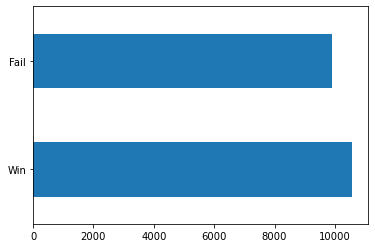

In [24]:
# 경기 데이터의 전체 승/패 차트
bronze_teams_df['win'].value_counts().plot.barh()

In [25]:
win = df1[ df1["win"] == "Win" ]
win_firstBlood = win[win["firstBlood"] == True]
win_firstBlood

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,100,Win,True,True,True,True,True,True,8,1,1,2,0,2,0,[]
2,100,Win,True,True,True,False,True,True,11,4,0,2,0,2,0,[]
3,100,Win,True,True,False,False,True,False,5,0,0,1,0,0,0,"[{'championId': 33, 'pickTurn': 1}, {'champion..."
5,100,Win,True,True,False,False,True,True,5,0,0,1,0,1,0,"[{'championId': 6, 'pickTurn': 1}, {'championI..."
9,100,Win,True,False,False,False,True,True,2,0,0,2,0,1,0,"[{'championId': 103, 'pickTurn': 1}, {'champio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20484,100,Win,True,True,True,False,False,True,9,2,0,1,0,1,0,[]
20489,100,Win,True,True,False,False,True,False,1,0,0,2,0,0,0,[]
20490,100,Win,True,True,True,False,True,True,7,1,0,2,0,1,0,[]
20496,100,Win,True,True,True,False,True,True,6,1,0,3,0,2,0,[]


In [26]:
lose = df1[ df1["win"] == "Fail" ]
lose_firstBlood = lose[lose["firstBlood"] == True]
lose_firstBlood

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
1,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,[]
17,100,Fail,True,False,False,False,True,False,3,0,0,1,0,0,0,[]
24,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,[]
25,100,Fail,True,False,False,False,True,False,3,0,0,2,0,0,0,[]
31,100,Fail,True,True,False,False,False,False,1,0,0,0,0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20488,100,Fail,True,True,False,False,False,False,1,0,0,0,0,0,0,[]
20492,100,Fail,True,False,False,False,True,False,2,0,0,2,0,0,0,[]
20493,100,Fail,True,False,False,True,True,False,8,1,3,2,0,0,0,[]
20495,100,Fail,True,True,False,False,True,True,5,0,0,3,0,1,0,[]


In [39]:
# 게임데이터 전체 승률
(len(win)/(len(win)+len(lose)))*100

51.61747458952306

# 퍼스트블러드에 따른 승/패 여부

<BarContainer object of 2 artists>

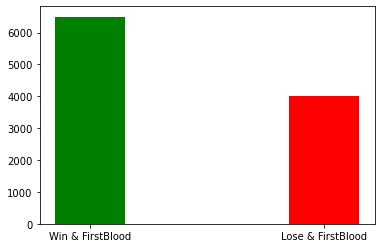

In [30]:
#pandas 를 이용한 시각화
labels = ['Win & FirstBlood', 'Lose & FirstBlood']
sizes = [len(win_firstBlood),len(lose_firstBlood)]
plt.bar(labels,sizes, width=0.3, color = ['green','red'])

<AxesSubplot:xlabel='firstBlood', ylabel='count'>

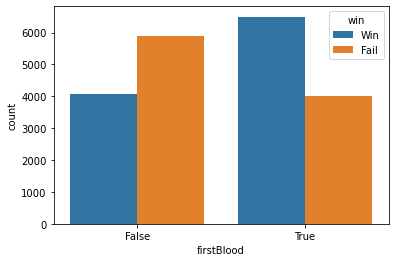

In [36]:
# seaborn 을 이용한 시각화
# firstBlood에 따른 승/패 여부
sns.countplot(x="firstBlood", data =bronze_teams_df, hue = 'win')

In [52]:
#퍼블따고 이길 확률
len(win_firstBlood)/len(bronze_teams_df)*100

31.753322908522286

In [50]:
#퍼블따고 질 확률
len(lose_firstBlood)/len(bronze_teams_df)*100

12.47556684910086

# 첫 타워 처치에 따른 승/패 여부

In [44]:
win_firstTower = win[win["firstTower"] == True]
lose_firstTower = lose[lose["firstTower"] == True]

<AxesSubplot:xlabel='firstTower', ylabel='count'>

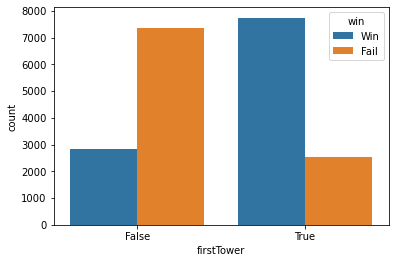

In [42]:
# firstTower에 따른 승/패 여부
sns.countplot(x="firstTower", data =bronze_teams_df, hue = 'win')

In [48]:
#퍼스트타워따고 이길 확률
len(win_firstTower)/len(bronze_teams_df)*100

37.8322908522283

In [53]:
#퍼스트타워따고 질 확률
len(lose_firstTower)/len(bronze_teams_df)*100

12.47556684910086

# 첫 억제기 처치에 따른 승/패 여부

In [54]:
win_firstInhibitor = win[win["firstInhibitor"] == True]
lose_firstInhibitor = lose[lose["firstInhibitor"] == True]

<AxesSubplot:xlabel='firstInhibitor', ylabel='count'>

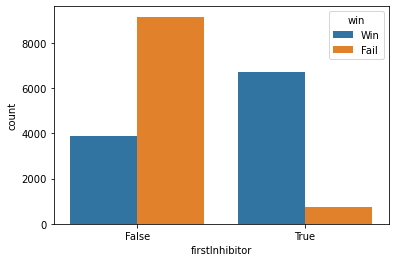

In [55]:
# firstInhibitor에 따른 승/패 여부
sns.countplot(x="firstInhibitor", data =bronze_teams_df, hue = 'win')

In [67]:
# 첫억제기 밀고 진 게임이 너무 적어서 확인해봤지만 2만게임중 750게임 밖에없는것으로 확인
lose_firstInhibitor

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
48,100,Fail,False,True,True,False,True,False,6,1,0,3,0,0,0,[]
96,100,Fail,True,False,True,False,False,False,9,3,0,2,0,0,0,[]
126,100,Fail,False,False,True,False,False,True,6,1,0,0,0,1,0,[]
184,100,Fail,True,True,True,False,False,False,8,1,0,3,0,0,0,[]
233,100,Fail,False,True,True,False,True,False,6,1,0,3,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20275,100,Fail,False,False,True,False,True,False,9,2,1,4,0,1,0,"[{'championId': 25, 'pickTurn': 1}, {'champion..."
20297,100,Fail,True,True,True,True,False,False,6,1,1,0,0,0,0,"[{'championId': 238, 'pickTurn': 1}, {'champio..."
20384,100,Fail,True,True,True,True,False,False,7,2,1,3,0,0,0,"[{'championId': 54, 'pickTurn': 1}, {'champion..."
20403,100,Fail,True,False,True,False,True,False,5,1,0,4,0,0,0,[]


In [57]:
#퍼스트억제기따고 이길 확률
len(win_firstInhibitor)/len(bronze_teams_df)*100

32.68666927286943

In [58]:
#퍼스트억제기따고 질 확률
len(lose_firstInhibitor)/len(bronze_teams_df)*100

3.664972634870993

In [59]:
#퍼스트억제기밀리고 질 확률
lose_firstInhibitor_F = lose[lose["firstInhibitor"] == False]
len(lose_firstInhibitor_F)/len(bronze_teams_df)*100

44.71755277560594

# 첫 용 처치에 따른 승/패 여부

<AxesSubplot:xlabel='firstDragon', ylabel='count'>

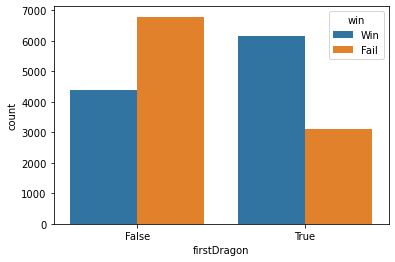

In [61]:
sns.countplot(x="firstDragon", data =bronze_teams_df, hue = 'win')

In [62]:
win_firstDragon = win[win["firstDragon"] == True]
lose_firstDragon = lose[lose["firstDragon"] == True]

In [63]:
#퍼스트 용 먹고 이길 확률
len(win_firstDragon)/len(bronze_teams_df)*100

30.116301798279903

In [64]:
#퍼스트 용 먹고 질 확률
len(lose_firstDragon)/len(bronze_teams_df)*100

15.202306489444878

# 타워 처치량에 따른 승/패 여부

<AxesSubplot:xlabel='towerKills', ylabel='count'>

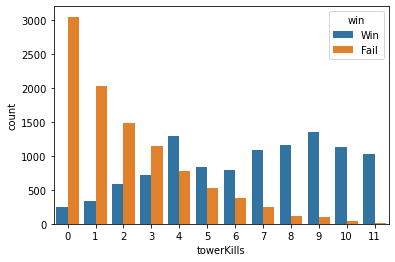

In [66]:
sns.countplot(x="towerKills", data =bronze_teams_df, hue = 'win')